In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
!pip install dash #install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 21.1 MB/s eta 0:00:00


In [ ]:
ev_data= pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')
ev_data.head(3)

VIN (1-10)   County       City State  Postal Code  Model Year      Make  \
0  2C4RC1N71H   Kitsap  Bremerton    WA      98311.0        2017  CHRYSLER   
1  2C4RC1N7XL  Stevens   Colville    WA      99114.0        2020  CHRYSLER   
2  KNDC3DLCXN   Yakima     Yakima    WA      98908.0        2022       KIA   

      Model                   Electric Vehicle Type  \
0  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
1  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
2       EV6          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible              33   
1            Clean Alternative Fuel Vehicle Eligible              32   
2  Eligibility unknown as battery range has not b...               0   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  23.0       349437882   
1          0                   7.0       154690532   
2          0                  14.0       219969144   

                  Vehicle Location        Electric Utility  2020 Census Tract  
0  POINT (-122.6466274 47.6341188)  PUGET SOUND ENERGY INC       5.303509e+10  
1     POINT (-117.90431 48.547075)             AVISTA CORP       5.306595e+10  
2  POINT (-120.6027202 46.5965625)              PACIFICORP       5.307700e+10

In [ ]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47806 entries, 0 to 47805
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         47806 non-null  object 
 1   County                                             47805 non-null  object 
 2   City                                               47805 non-null  object 
 3   State                                              47806 non-null  object 
 4   Postal Code                                        47805 non-null  float64
 5   Model Year                                         47806 non-null  int64  
 6   Make                                               47806 non-null  object 
 7   Model                                              47806 non-null  object 
 8   Electric Vehicle Type                              47806 non-null  object 
 9   Clean 

In [ ]:
#change columns to string data type
ev_data['Postal Code']= ev_data['Postal Code'].astype('str')
ev_data['Model Year']= ev_data['Model Year'].astype('str')
ev_data['Legislative District']= ev_data['Legislative District'].astype('str')
ev_data['DOL Vehicle ID']= ev_data['DOL Vehicle ID'].astype('str')

In [ ]:
ev_data.info() #check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47806 entries, 0 to 47805
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         47806 non-null  object 
 1   County                                             47805 non-null  object 
 2   City                                               47805 non-null  object 
 3   State                                              47806 non-null  object 
 4   Postal Code                                        47806 non-null  object 
 5   Model Year                                         47806 non-null  object 
 6   Make                                               47806 non-null  object 
 7   Model                                              47806 non-null  object 
 8   Electric Vehicle Type                              47806 non-null  object 
 9   Clean 

In [ ]:
#replace zeros with nan to be dropped
ev_data['Electric Range'].replace(0, np.nan, inplace= True)

In [ ]:
ev_data.head(3)

VIN (1-10)   County       City State Postal Code Model Year      Make  \
0  2C4RC1N71H   Kitsap  Bremerton    WA     98311.0       2017  CHRYSLER   
1  2C4RC1N7XL  Stevens   Colville    WA     99114.0       2020  CHRYSLER   
2  KNDC3DLCXN   Yakima     Yakima    WA     98908.0       2022       KIA   

      Model                   Electric Vehicle Type  \
0  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
1  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
2       EV6          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible            33.0   
1            Clean Alternative Fuel Vehicle Eligible            32.0   
2  Eligibility unknown as battery range has not b...             NaN   

   Base MSRP Legislative District DOL Vehicle ID  \
0          0                 23.0      349437882   
1          0                  7.0      154690532   
2          0                 14.0      219969144   

                  Vehicle Location        Electric Utility  2020 Census Tract  
0  POINT (-122.6466274 47.6341188)  PUGET SOUND ENERGY INC       5.303509e+10  
1     POINT (-117.90431 48.547075)             AVISTA CORP       5.306595e+10  
2  POINT (-120.6027202 46.5965625)              PACIFICORP       5.307700e+10

In [ ]:
ev_data['Base MSRP'].replace(0, np.nan, inplace= True) #repalce zeros with nan to be dropped

In [ ]:
ev_data.head(3) #check

VIN (1-10)   County       City State Postal Code Model Year      Make  \
0  2C4RC1N71H   Kitsap  Bremerton    WA     98311.0       2017  CHRYSLER   
1  2C4RC1N7XL  Stevens   Colville    WA     99114.0       2020  CHRYSLER   
2  KNDC3DLCXN   Yakima     Yakima    WA     98908.0       2022       KIA   

      Model                   Electric Vehicle Type  \
0  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
1  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
2       EV6          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible            33.0   
1            Clean Alternative Fuel Vehicle Eligible            32.0   
2  Eligibility unknown as battery range has not b...             NaN   

   Base MSRP Legislative District DOL Vehicle ID  \
0        NaN                 23.0      349437882   
1        NaN                  7.0      154690532   
2        NaN                 14.0      219969144   

                  Vehicle Location        Electric Utility  2020 Census Tract  
0  POINT (-122.6466274 47.6341188)  PUGET SOUND ENERGY INC       5.303509e+10  
1     POINT (-117.90431 48.547075)             AVISTA CORP       5.306595e+10  
2  POINT (-120.6027202 46.5965625)              PACIFICORP       5.307700e+10

In [ ]:
ev_data['Electric Range'].dropna(inplace= True)

In [ ]:
ev_data['Base MSRP'].dropna(inplace= True)

In [ ]:
ev_data.describe()

Electric Range      Base MSRP  2020 Census Tract
count    24276.000000     986.000000       4.780400e+04
mean       125.468158   57231.566937       5.303287e+10
std         99.275201   19001.399657       1.830804e+08
min          6.000000   31950.000000       1.308902e+10
25%         32.000000   39995.000000       5.303301e+10
50%         84.000000   59900.000000       5.303302e+10
75%        215.000000   69900.000000       5.303303e+10
max        337.000000  184400.000000       5.307794e+10

In [ ]:
ev_data.isna().sum()

VIN (1-10)                                               0
County                                                   1
City                                                     1
State                                                    0
Postal Code                                              0
Model Year                                               0
Make                                                     0
Model                                                    0
Electric Vehicle Type                                    0
Clean Alternative Fuel Vehicle (CAFV) Eligibility        0
Electric Range                                       23530
Base MSRP                                            46820
Legislative District                                     0
DOL Vehicle ID                                           0
Vehicle Location                                         1
Electric Utility                                         1
2020 Census Tract                                       

In [ ]:
ev_data.head()

VIN (1-10)    County               City State Postal Code Model Year  \
0  2C4RC1N71H    Kitsap          Bremerton    WA     98311.0       2017   
1  2C4RC1N7XL   Stevens           Colville    WA     99114.0       2020   
2  KNDC3DLCXN    Yakima             Yakima    WA     98908.0       2022   
3  5YJ3E1EA0J    Kitsap  Bainbridge Island    WA     98110.0       2018   
4  1N4AZ1CP7J  Thurston           Tumwater    WA     98501.0       2018   

       Make     Model                   Electric Vehicle Type  \
0  CHRYSLER  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
1  CHRYSLER  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
2       KIA       EV6          Battery Electric Vehicle (BEV)   
3     TESLA   MODEL 3          Battery Electric Vehicle (BEV)   
4    NISSAN      LEAF          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible            33.0   
1            Clean Alternative Fuel Vehicle Eligible            32.0   
2  Eligibility unknown as battery range has not b...             NaN   
3            Clean Alternative Fuel Vehicle Eligible           215.0   
4            Clean Alternative Fuel Vehicle Eligible           151.0   

   Base MSRP Legislative District DOL Vehicle ID  \
0        NaN                 23.0      349437882   
1        NaN                  7.0      154690532   
2        NaN                 14.0      219969144   
3        NaN                 23.0      476786887   
4        NaN                 35.0      201185253   

                  Vehicle Location        Electric Utility  2020 Census Tract  
0  POINT (-122.6466274 47.6341188)  PUGET SOUND ENERGY INC       5.303509e+10  
1     POINT (-117.90431 48.547075)             AVISTA CORP       5.306595e+10  
2  POINT (-120.6027202 46.5965625)              PACIFICORP       5.307700e+10  
3  POINT (-122.5235781 47.6293323)  PUGET SOUND ENERGY INC       5.303509e+10  
4     POINT (-122.89692 47.043535)  PUGET SOUND ENERGY INC       5.306701e+10

In [ ]:
ev_data.isnull()

VIN (1-10)  County   City  State  Postal Code  Model Year   Make  \
0           False   False  False  False        False       False  False   
1           False   False  False  False        False       False  False   
2           False   False  False  False        False       False  False   
3           False   False  False  False        False       False  False   
4           False   False  False  False        False       False  False   
...           ...     ...    ...    ...          ...         ...    ...   
47801       False   False  False  False        False       False  False   
47802       False   False  False  False        False       False  False   
47803       False   False  False  False        False       False  False   
47804       False   False  False  False        False       False  False   
47805       False   False  False  False        False       False  False   

       Model  Electric Vehicle Type  \
0      False                  False   
1      False                  False   
2      False                  False   
3      False                  False   
4      False                  False   
...      ...                    ...   
47801  False                  False   
47802  False                  False   
47803  False                  False   
47804  False                  False   
47805  False                  False   

       Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                                                  False           False   
1                                                  False           False   
2                                                  False            True   
3                                                  False           False   
4                                                  False           False   
...                                                  ...             ...   
47801                                              False           False   
47802                                              False           False   
47803                                              False           False   
47804                                              False            True   
47805                                              False           False   

       Base MSRP  Legislative District  DOL Vehicle ID  Vehicle Location  \
0           True                 False           False             False   
1           True                 False           False             False   
2           True                 False           False             False   
3           True                 False           False             False   
4           True                 False           False             False   
...          ...                   ...             ...               ...   
47801       True                 False           False             False   
47802       True                 False           False             False   
47803       True                 False           False             False   
47804       True                 False           False             False   
47805       True                 False           False             False   

       Electric Utility  2020 Census Tract  
0                 False              False  
1                 False              False  
2                 False              False  
3                 False              False  
4                 False              False  
...                 ...                ...  
47801             False              False  
47802             False              False  
47803             False              False  
47804             False              False  
47805             False               True  

[47806 rows x 17 columns]

In [ ]:
ev = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

In [ ]:
ev.head()

VIN (1-10)    County               City State  Postal Code  Model Year  \
0  2C4RC1N71H    Kitsap          Bremerton    WA      98311.0        2017   
1  2C4RC1N7XL   Stevens           Colville    WA      99114.0        2020   
2  KNDC3DLCXN    Yakima             Yakima    WA      98908.0        2022   
3  5YJ3E1EA0J    Kitsap  Bainbridge Island    WA      98110.0        2018   
4  1N4AZ1CP7J  Thurston           Tumwater    WA      98501.0        2018   

       Make     Model                   Electric Vehicle Type  \
0  CHRYSLER  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
1  CHRYSLER  PACIFICA  Plug-in Hybrid Electric Vehicle (PHEV)   
2       KIA       EV6          Battery Electric Vehicle (BEV)   
3     TESLA   MODEL 3          Battery Electric Vehicle (BEV)   
4    NISSAN      LEAF          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible              33   
1            Clean Alternative Fuel Vehicle Eligible              32   
2  Eligibility unknown as battery range has not b...               0   
3            Clean Alternative Fuel Vehicle Eligible             215   
4            Clean Alternative Fuel Vehicle Eligible             151   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  23.0       349437882   
1          0                   7.0       154690532   
2          0                  14.0       219969144   
3          0                  23.0       476786887   
4          0                  35.0       201185253   

                  Vehicle Location        Electric Utility  2020 Census Tract  
0  POINT (-122.6466274 47.6341188)  PUGET SOUND ENERGY INC       5.303509e+10  
1     POINT (-117.90431 48.547075)             AVISTA CORP       5.306595e+10  
2  POINT (-120.6027202 46.5965625)              PACIFICORP       5.307700e+10  
3  POINT (-122.5235781 47.6293323)  PUGET SOUND ENERGY INC       5.303509e+10  
4     POINT (-122.89692 47.043535)  PUGET SOUND ENERGY INC       5.306701e+10

In [ ]:
ev_2= ev.copy()

In [ ]:
#change columns to string data type
ev_2['Postal Code']= ev_2['Postal Code'].astype('str')
ev_2['Model Year']= ev_2['Model Year'].astype('str')
ev_2['Legislative District']= ev_2['Legislative District'].astype('str')
ev_2['DOL Vehicle ID']= ev_2['DOL Vehicle ID'].astype('str')

In [ ]:
ev_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52158 entries, 0 to 52157
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         52158 non-null  object 
 1   County                                             52157 non-null  object 
 2   City                                               52157 non-null  object 
 3   State                                              52158 non-null  object 
 4   Postal Code                                        52158 non-null  object 
 5   Model Year                                         52158 non-null  object 
 6   Make                                               52158 non-null  object 
 7   Model                                              52158 non-null  object 
 8   Electric Vehicle Type                              52158 non-null  object 
 9   Clean 

In [ ]:
# prompt: Remove zeros from Base MSRP column
ev_2['Base MSRP'].replace(0, np.nan, inplace= True)
ev_2.dropna(subset=['Base MSRP'], inplace=True)

In [ ]:
ev_2.head()

VIN (1-10)       County       City State Postal Code Model Year   Make  \
6    WMZYU7C51K       Yakima     Yakima    WA     98902.0       2019   MINI   
95   KNDJP3AE9G  Walla Walla  Waitsburg    WA     99361.0       2016    KIA   
144  5YJSA1H11E         King   Kirkland    WA     98034.0       2014  TESLA   
305  WBAJB1C55J      Cowlitz   Longview    WA     98632.0       2018    BMW   
326  5YJSA1H12E         King    Seattle    WA     98108.0       2014  TESLA   

          Model                   Electric Vehicle Type  \
6    COUNTRYMAN  Plug-in Hybrid Electric Vehicle (PHEV)   
95         SOUL          Battery Electric Vehicle (BEV)   
144     MODEL S          Battery Electric Vehicle (BEV)   
305        530E  Plug-in Hybrid Electric Vehicle (PHEV)   
326     MODEL S          Battery Electric Vehicle (BEV)   

    Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
6               Not eligible due to low battery range              12   
95            Clean Alternative Fuel Vehicle Eligible              93   
144           Clean Alternative Fuel Vehicle Eligible             208   
305             Not eligible due to low battery range              14   
326           Clean Alternative Fuel Vehicle Eligible             208   

     Base MSRP Legislative District DOL Vehicle ID  \
6      36900.0                 14.0      146830148   
95     31950.0                 16.0      132370066   
144    69900.0                 45.0      222335347   
305    54950.0                 19.0      135760355   
326    69900.0                 11.0      232164236   

                    Vehicle Location  \
6     POINT (-120.524012 46.5973939)   
95      POINT (-118.15324 46.267955)   
144     POINT (-122.209285 47.71124)   
305  POINT (-122.9379953 46.1372997)   
326  POINT (-122.3268963 47.5499519)   

                                      Electric Utility  2020 Census Tract  
6                                           PACIFICORP       5.307700e+10  
95                                          PACIFICORP       5.307192e+10  
144      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10  
305  BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...       5.301500e+10  
326       CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10

In [ ]:
#drop zeros from Electric Range
ev_2['Electric Range'].replace(0, np.nan, inplace= True)
ev_2.dropna(subset=['Electric Range'], inplace=True)

In [ ]:
ev_2.head()

VIN (1-10)       County       City State Postal Code Model Year   Make  \
6    WMZYU7C51K       Yakima     Yakima    WA     98902.0       2019   MINI   
95   KNDJP3AE9G  Walla Walla  Waitsburg    WA     99361.0       2016    KIA   
144  5YJSA1H11E         King   Kirkland    WA     98034.0       2014  TESLA   
305  WBAJB1C55J      Cowlitz   Longview    WA     98632.0       2018    BMW   
326  5YJSA1H12E         King    Seattle    WA     98108.0       2014  TESLA   

          Model                   Electric Vehicle Type  \
6    COUNTRYMAN  Plug-in Hybrid Electric Vehicle (PHEV)   
95         SOUL          Battery Electric Vehicle (BEV)   
144     MODEL S          Battery Electric Vehicle (BEV)   
305        530E  Plug-in Hybrid Electric Vehicle (PHEV)   
326     MODEL S          Battery Electric Vehicle (BEV)   

    Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
6               Not eligible due to low battery range              12   
95            Clean Alternative Fuel Vehicle Eligible              93   
144           Clean Alternative Fuel Vehicle Eligible             208   
305             Not eligible due to low battery range              14   
326           Clean Alternative Fuel Vehicle Eligible             208   

     Base MSRP Legislative District DOL Vehicle ID  \
6      36900.0                 14.0      146830148   
95     31950.0                 16.0      132370066   
144    69900.0                 45.0      222335347   
305    54950.0                 19.0      135760355   
326    69900.0                 11.0      232164236   

                    Vehicle Location  \
6     POINT (-120.524012 46.5973939)   
95      POINT (-118.15324 46.267955)   
144     POINT (-122.209285 47.71124)   
305  POINT (-122.9379953 46.1372997)   
326  POINT (-122.3268963 47.5499519)   

                                      Electric Utility  2020 Census Tract  
6                                           PACIFICORP       5.307700e+10  
95                                          PACIFICORP       5.307192e+10  
144      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303302e+10  
305  BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...       5.301500e+10  
326       CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10

In [ ]:
ev_2.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [ ]:
ev_2.dropna(subset=['County'], inplace=True)
ev_2.dropna(subset=['City'], inplace=True)
ev_2.dropna(subset=['Vehicle Location'], inplace=True)
ev_2.dropna(subset=['Electric Utility'], inplace=True)
ev_2.dropna(subset=['2020 Census Tract'], inplace=True)

ev_2.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [ ]:
ev_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 6 to 52129
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         1089 non-null   object 
 1   County                                             1089 non-null   object 
 2   City                                               1089 non-null   object 
 3   State                                              1089 non-null   object 
 4   Postal Code                                        1089 non-null   object 
 5   Model Year                                         1089 non-null   object 
 6   Make                                               1089 non-null   object 
 7   Model                                              1089 non-null   object 
 8   Electric Vehicle Type                              1089 non-null   object 
 9   Clean A

In [ ]:
ev_2.describe(include= 'all')

VIN (1-10) County     City State Postal Code Model Year   Make  \
count         1089   1089     1089  1089        1089       1089   1089   
unique         394     14       81     1         143         11     10   
top     5YJSA1H1XE   King  Seattle    WA     98033.0       2013  TESLA   
freq            20    824      275  1089          40        245    522   
mean           NaN    NaN      NaN   NaN         NaN        NaN    NaN   
std            NaN    NaN      NaN   NaN         NaN        NaN    NaN   
min            NaN    NaN      NaN   NaN         NaN        NaN    NaN   
25%            NaN    NaN      NaN   NaN         NaN        NaN    NaN   
50%            NaN    NaN      NaN   NaN         NaN        NaN    NaN   
75%            NaN    NaN      NaN   NaN         NaN        NaN    NaN   
max            NaN    NaN      NaN   NaN         NaN        NaN    NaN   

          Model           Electric Vehicle Type  \
count      1089                            1089   
unique       16                               2   
top     MODEL S  Battery Electric Vehicle (BEV)   
freq        505                             719   
mean        NaN                             NaN   
std         NaN                             NaN   
min         NaN                             NaN   
25%         NaN                             NaN   
50%         NaN                             NaN   
75%         NaN                             NaN   
max         NaN                             NaN   

       Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
count                                               1089     1089.000000   
unique                                                 2             NaN   
top              Clean Alternative Fuel Vehicle Eligible             NaN   
freq                                                 761             NaN   
mean                                                 NaN      125.777778   
std                                                  NaN       89.966488   
min                                                  NaN       12.000000   
25%                                                  NaN       17.000000   
50%                                                  NaN      100.000000   
75%                                                  NaN      208.000000   
max                                                  NaN      265.000000   

            Base MSRP Legislative District DOL Vehicle ID  \
count     1089.000000                 1089           1089   
unique            NaN                   38           1089   
top               NaN                 41.0      146830148   
freq              NaN                  109              1   
mean     57206.570248                  NaN            NaN   
std      18791.002159                  NaN            NaN   
min      31950.000000                  NaN            NaN   
25%      39995.000000                  NaN            NaN   
50%      59900.000000                  NaN            NaN   
75%      69900.000000                  NaN            NaN   
max     184400.000000                  NaN            NaN   

                  Vehicle Location  \
count                         1089   
unique                         143   
top     POINT (-122.20264 47.6785)   
freq                            40   
mean                           NaN   
std                            NaN   
min                            NaN   
25%                            NaN   
50%                            NaN   
75%                            NaN   
max                            NaN   

                                     Electric Utility  2020 Census Tract  
count                                            1089       1.089000e+03  
unique                                             12                NaN  
top     PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                NaN  
freq                                              525                NaN  
mean                        

# Observations


*   Averge MSRP = 57K
*   Average Range = 123 mi
*   Top make= Tesla
*   Top Model= Tesla Model S
*   City with the most EV's= Seattle
*   County with the most EV's= King
*   Top type= Battery Electric Vehicle (BEV)





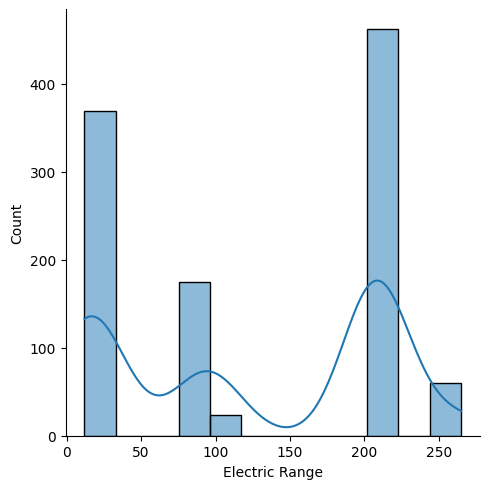

In [ ]:
#get Distribution of MSRP
sns.displot(data= ev_2, x= 'Electric Range', kde= True)

<Axes: xlabel='Electric Range'>

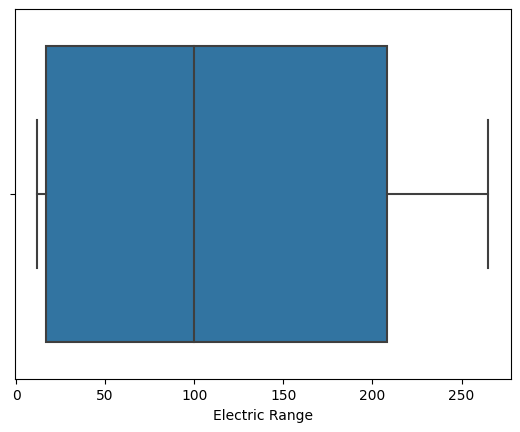

In [ ]:
sns.boxplot(data= ev_2, x= "Electric Range")
# plt.axhline(ev_2['Electric Range'].mean(), color='r', linestyle='--')

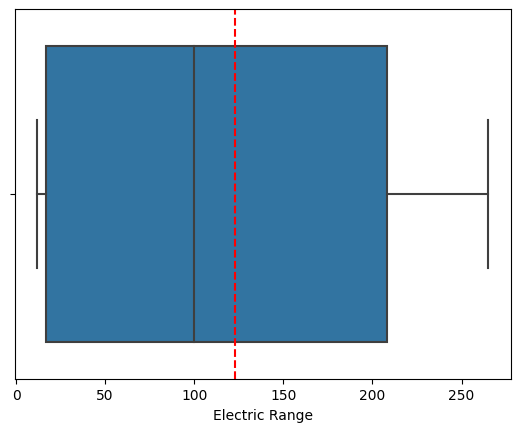

In [ ]:
# prompt: add a dotted line to box plot for mean

sns.boxplot(data= ev_2, x= "Electric Range")
plt.axvline(123, color='r', linestyle='--')

<Figure size 3000x1500 with 0 Axes>

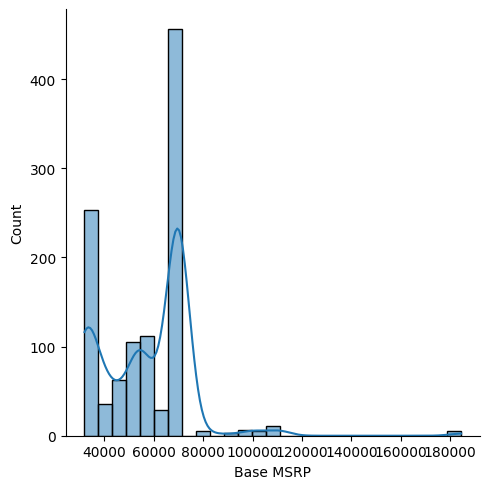

In [ ]:
fig= plt.figure(figsize=(30,15))
sns.displot(data= ev_2, x= 'Base MSRP', kde= True)

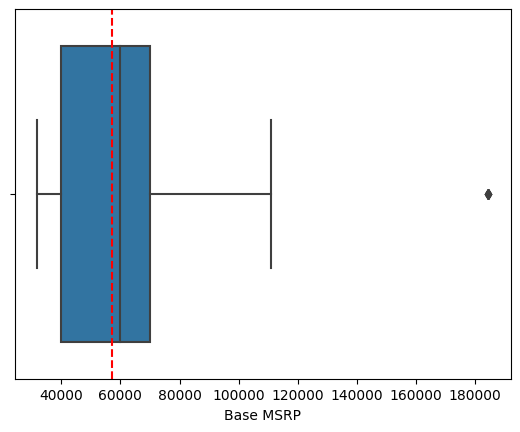

In [ ]:
sns.boxplot(data= ev_2, x= "Base MSRP")
plt.axvline(57170, color='r', linestyle='--')

In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 30.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2ae13f300d33b7890a32fd7a0115d45f8af33ad82ff99a66eb0498b52ce26ded
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

In [ ]:
from ydata_profiling import ProfileReport

ImportError: ignored

In [ ]:
!pip show typing-extensions

Name: typing_extensions
Version: 4.9.0
Summary: Backported and Experimental Type Hints for Python 3.8+
Home-page: 
Author: 
Author-email: "Guido van Rossum, Jukka Lehtosalo, Łukasz Langa, Michael Lee" <levkivskyi@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: arviz, chex, dash, flax, huggingface-hub, ibis-framework, inflect, librosa, orbax-checkpoint, panel, polars, pydantic, pydantic_core, pymc, pytensor, python-utils, qudida, SQLAlchemy, tensorflow, tensorflow-probability, torch, typeguard, typer


In [ ]:
!pip show pandas-profiling

In [ ]:
!pip show ydata_profiling

Name: ydata-profiling
Version: 4.6.3
Summary: Generate profile report for pandas DataFrame
Home-page: https://github.com/ydataai/ydata-profiling
Author: YData Labs Inc
Author-email: opensource@ydata.ai
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: dacite, htmlmin, imagehash, jinja2, matplotlib, multimethod, numba, numpy, pandas, phik, pydantic, PyYAML, requests, scipy, seaborn, statsmodels, tqdm, typeguard, visions, wordcloud
Required-by: 


In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 37.8 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv

                                             |          | [  0%]   00:00 -> (? left)


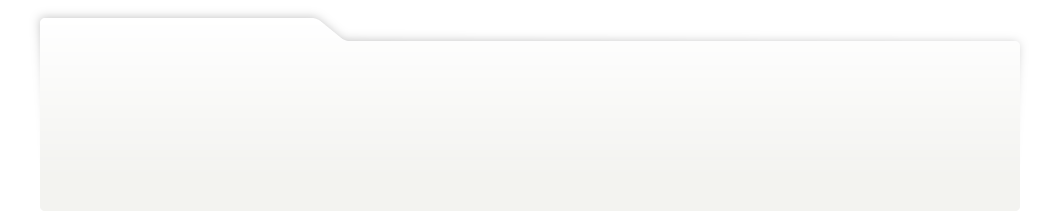
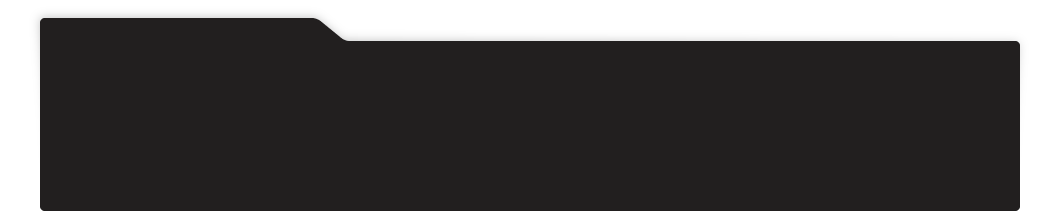
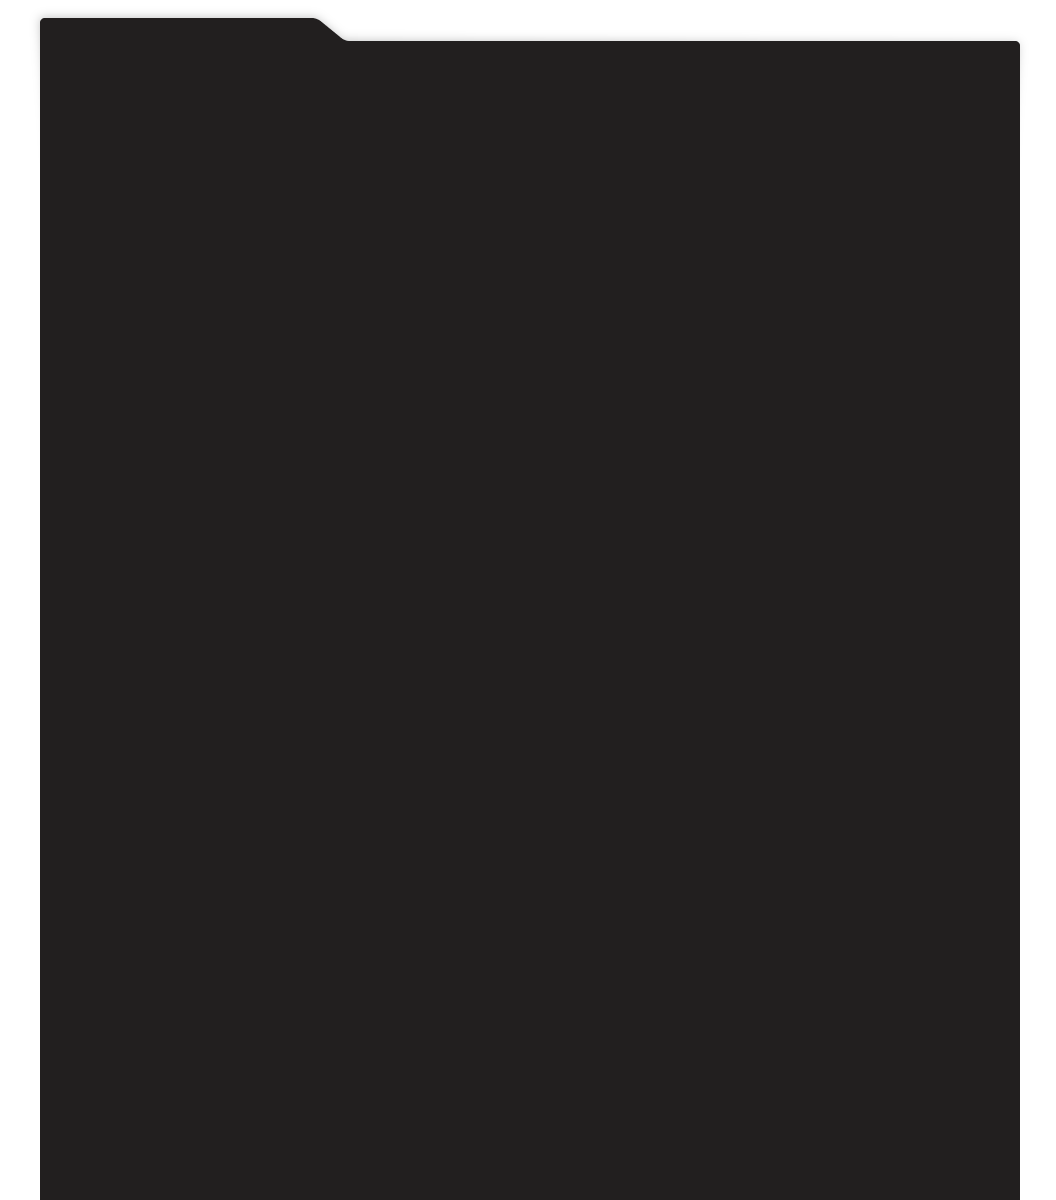
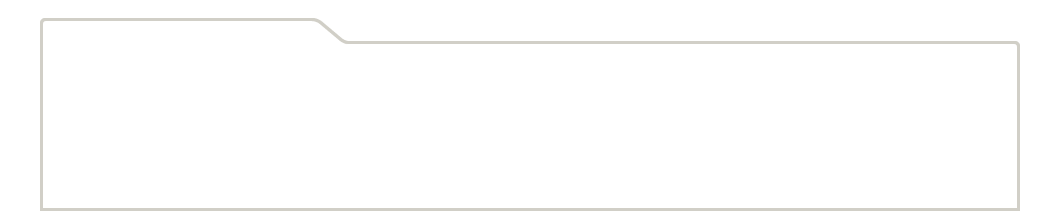
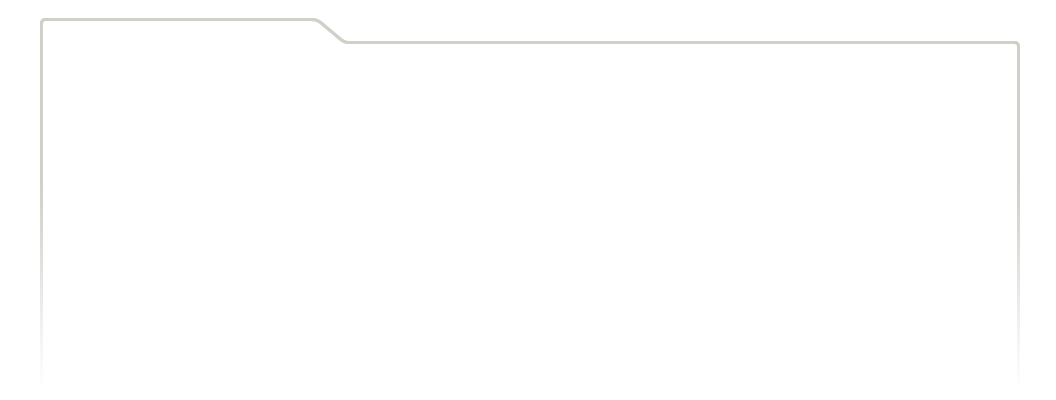
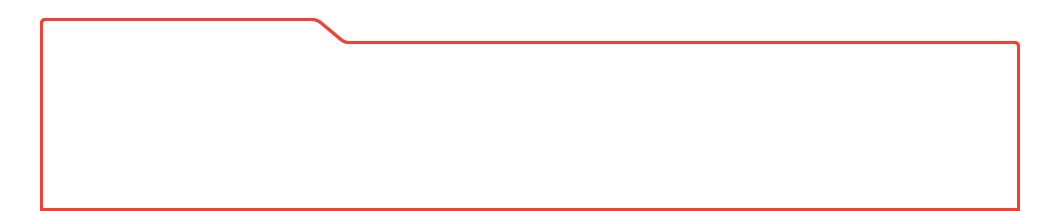
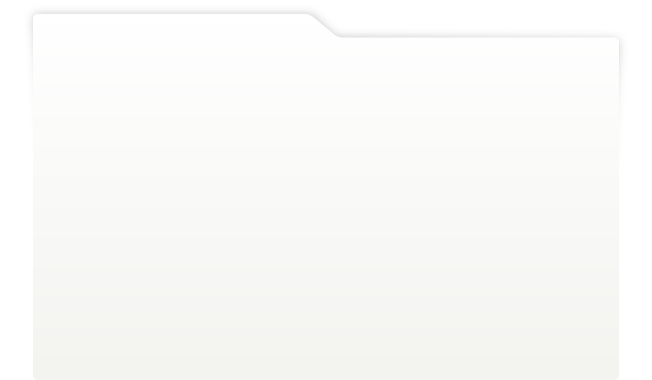
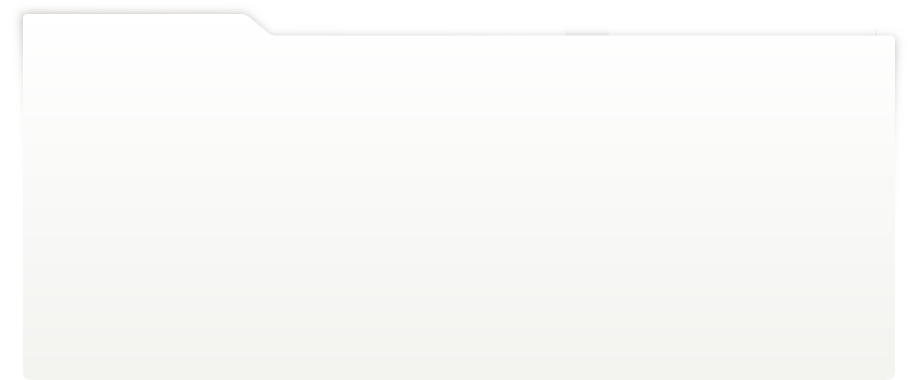
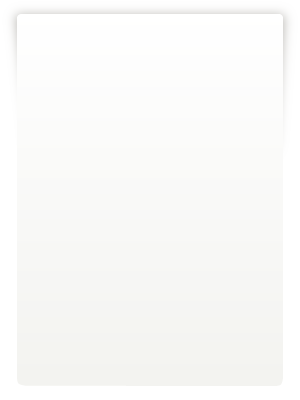
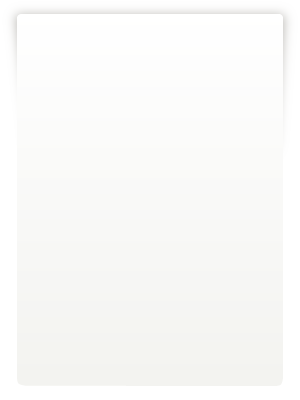
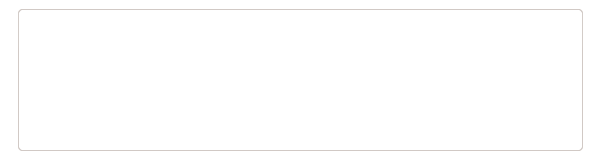
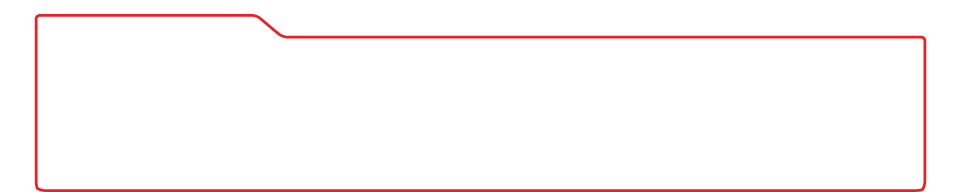
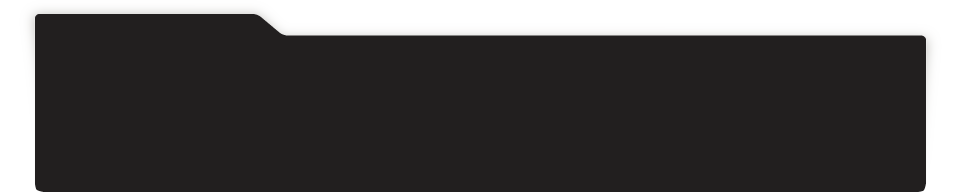
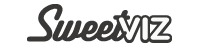
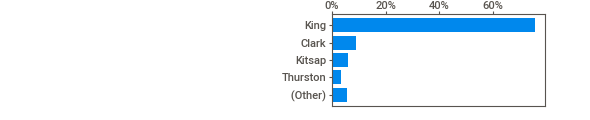
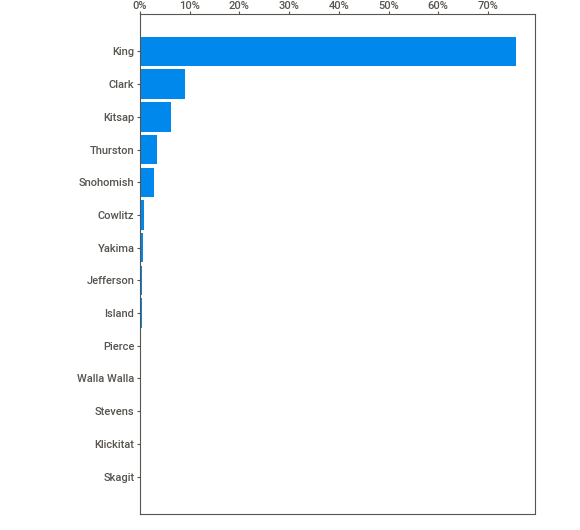
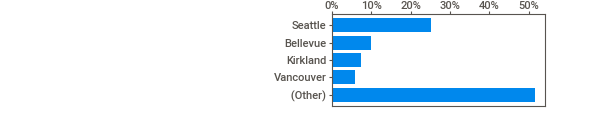
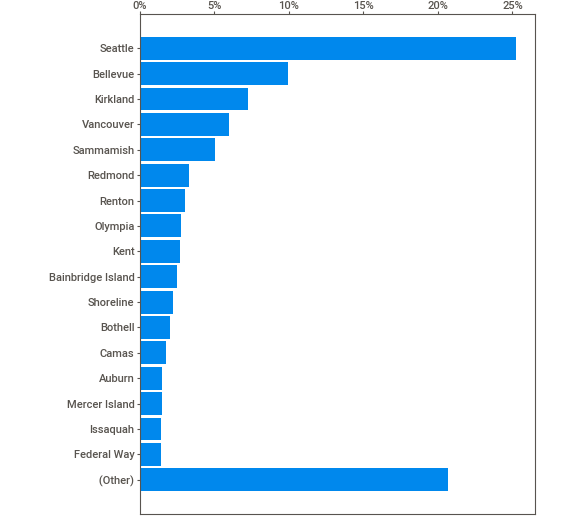
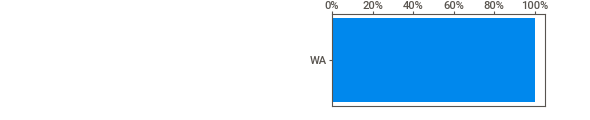
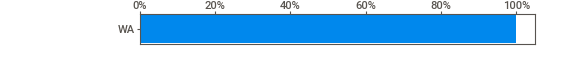
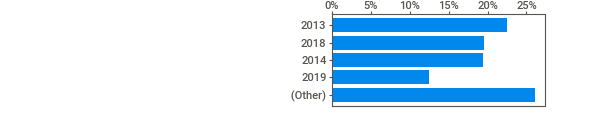
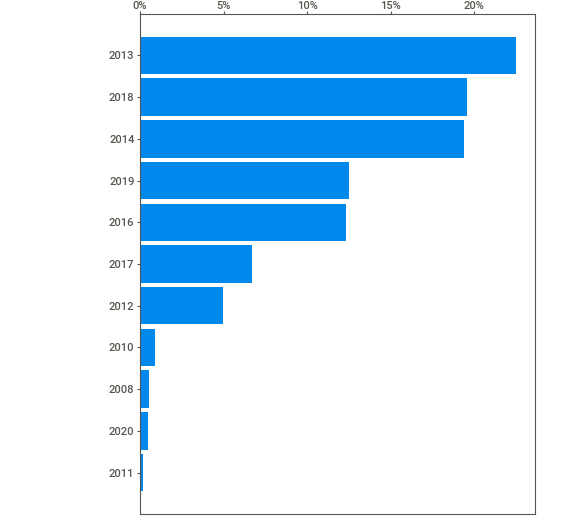
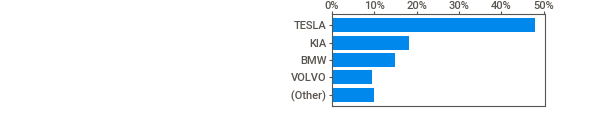
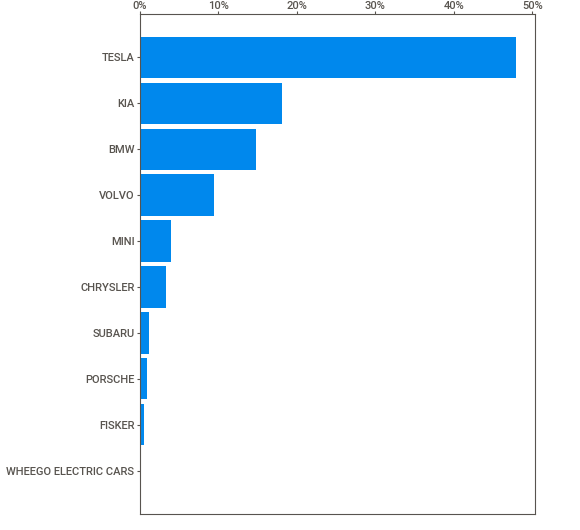
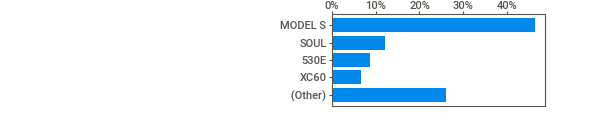
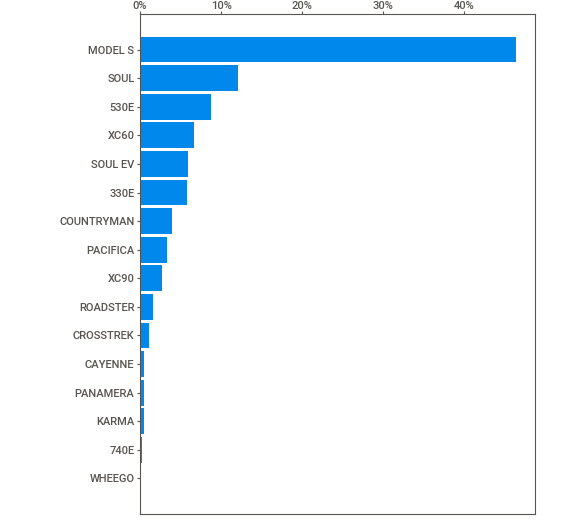
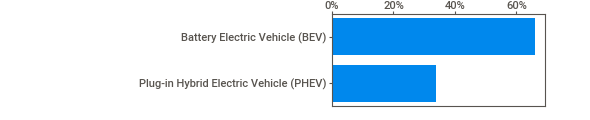
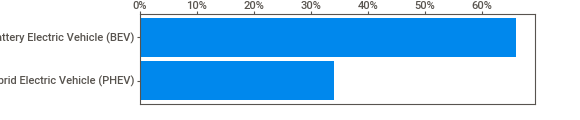
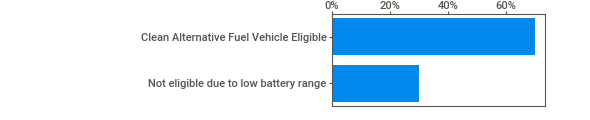
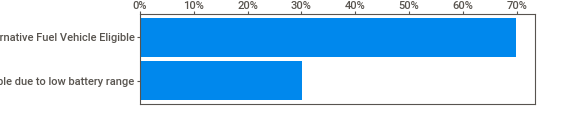
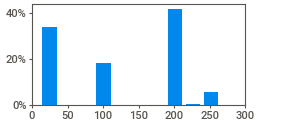
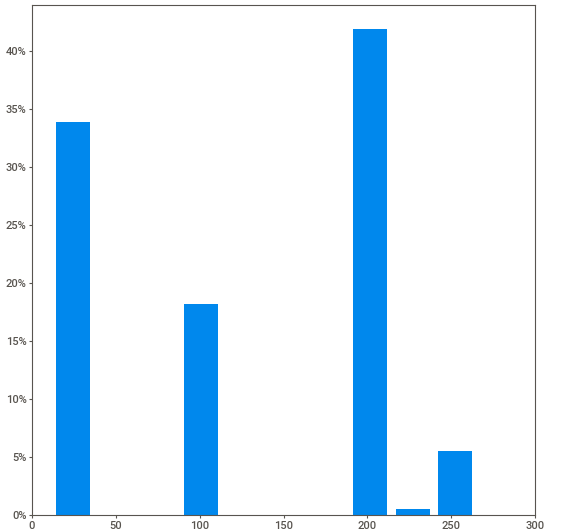
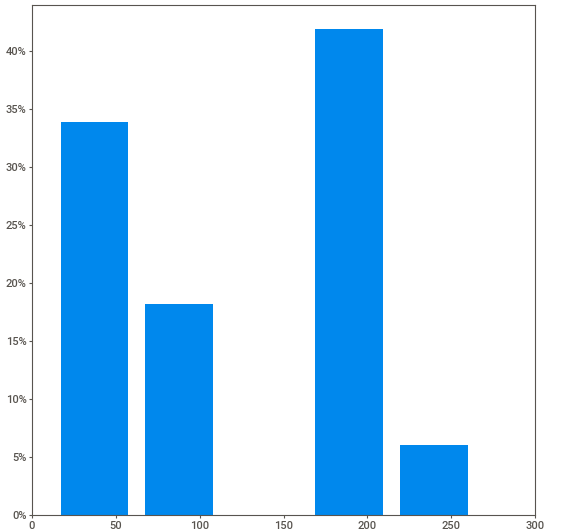
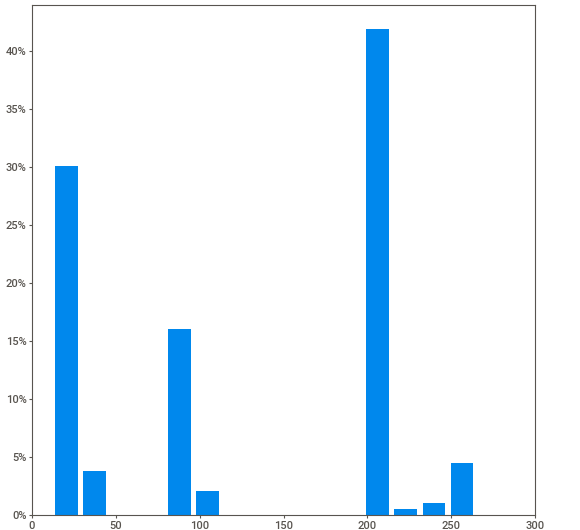
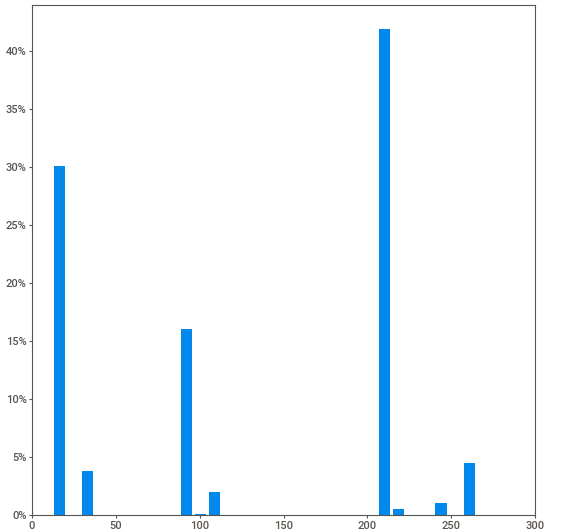
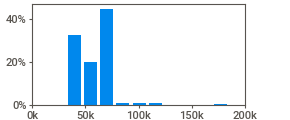
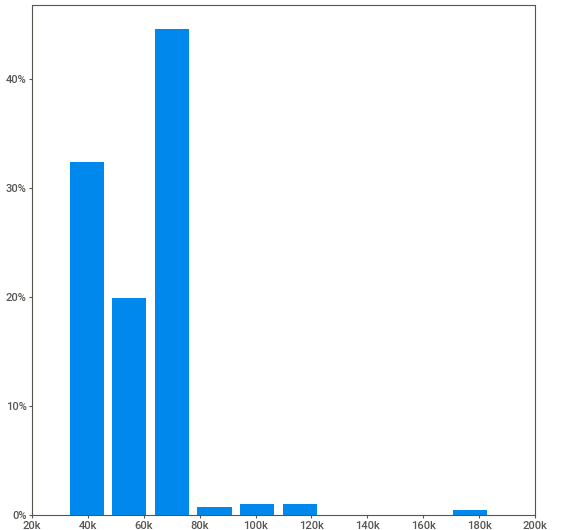
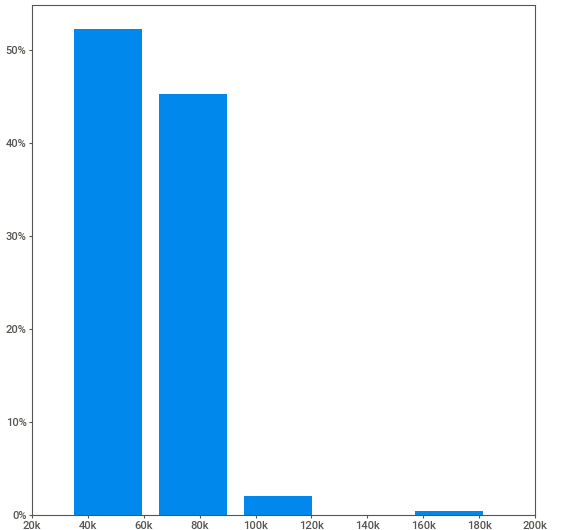
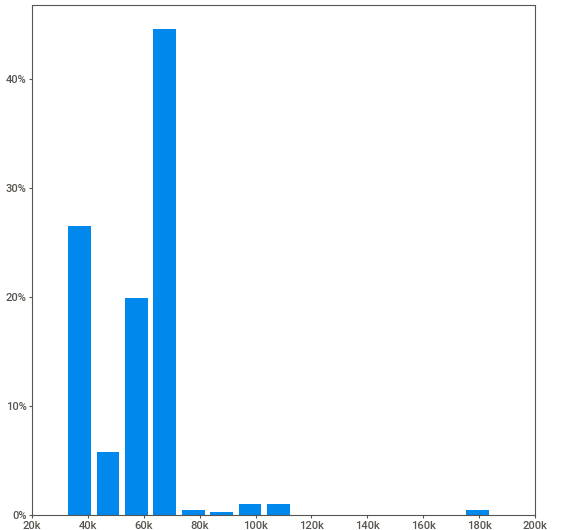
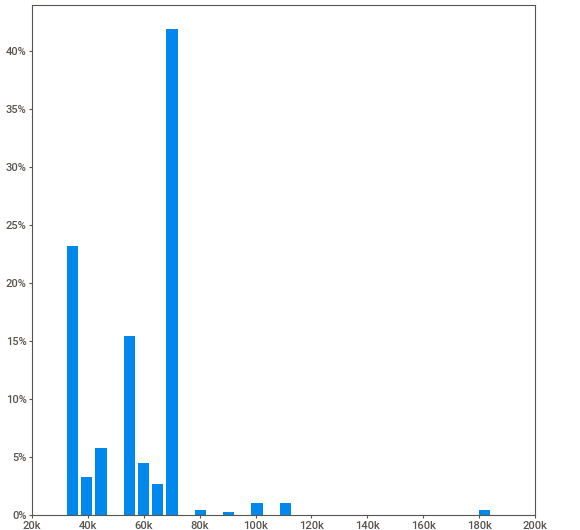
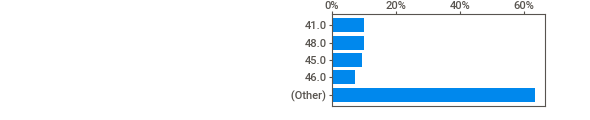
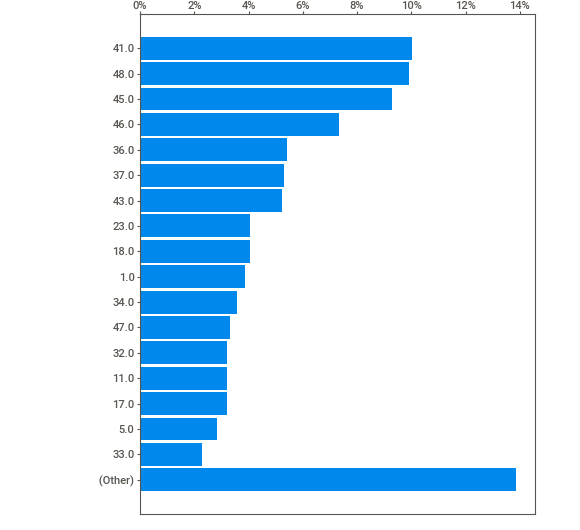
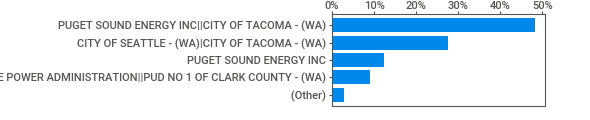
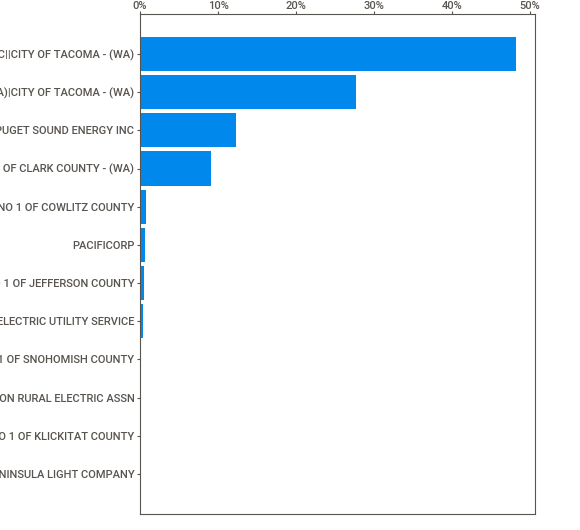
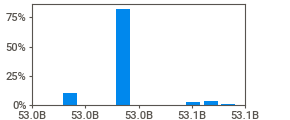
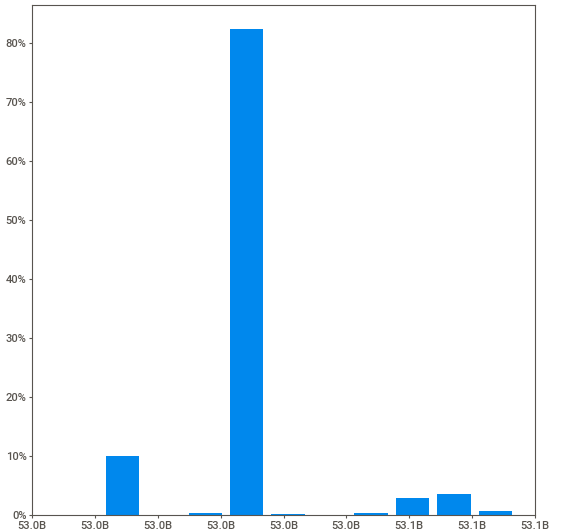
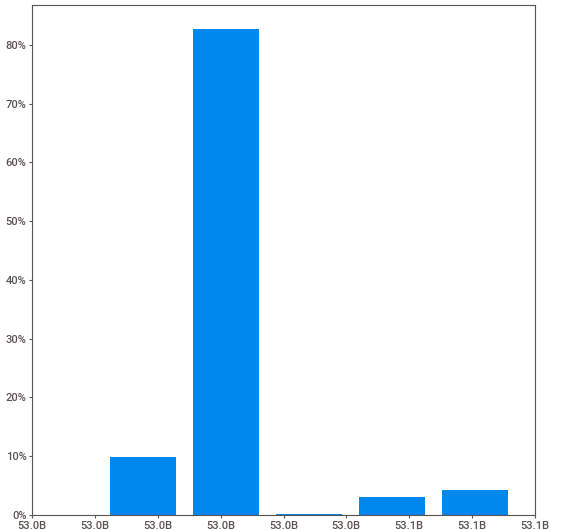
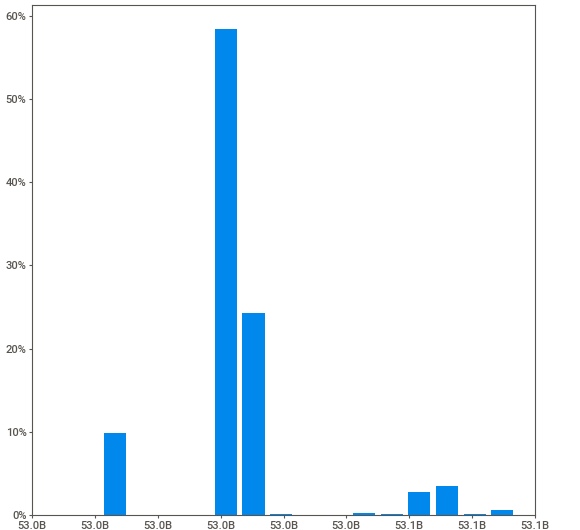
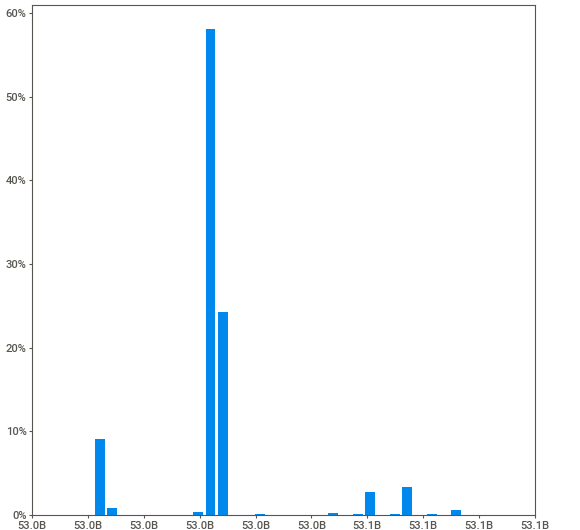
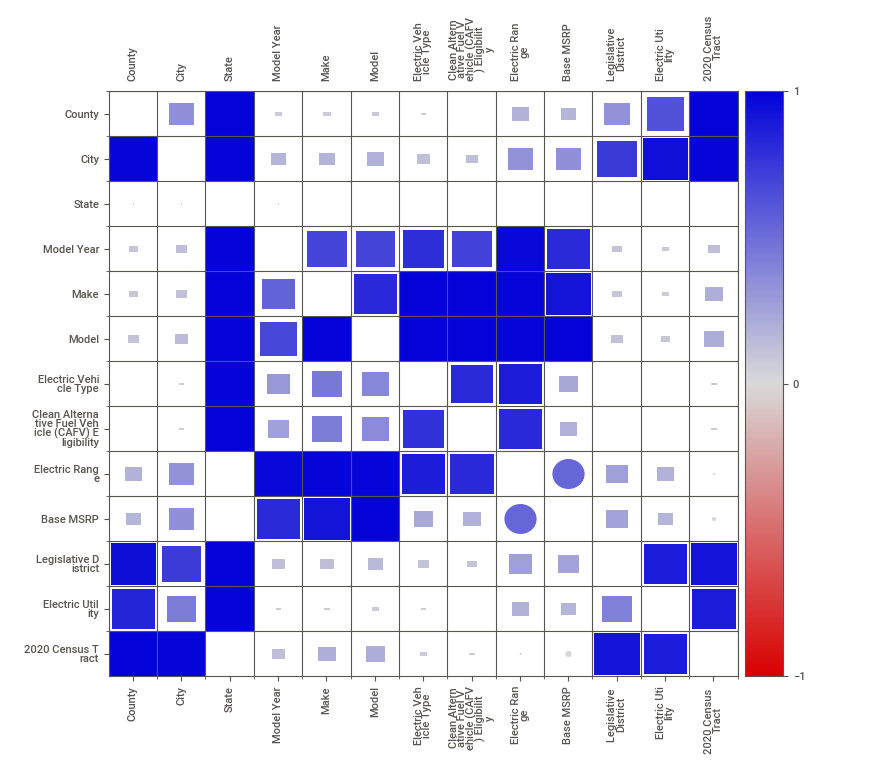
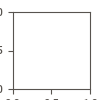

In [ ]:
ev_analysis= sv.analyze(ev_2)
ev_analysis.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


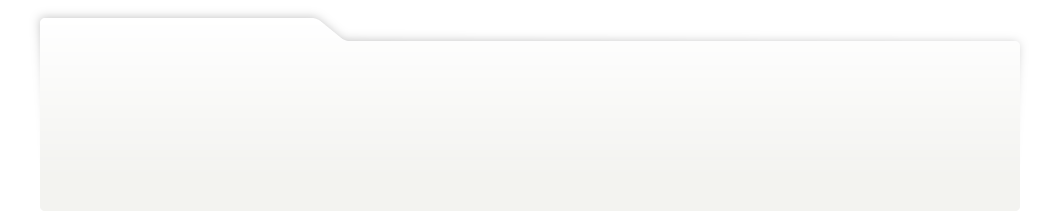
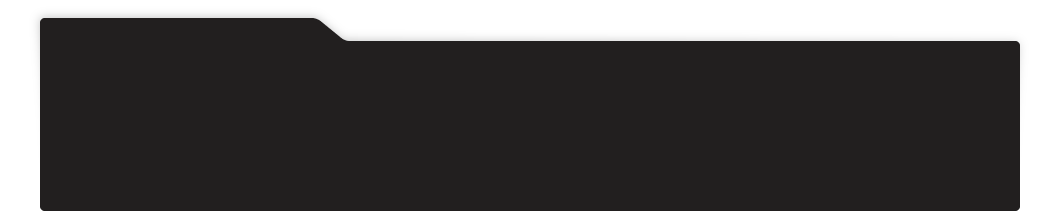
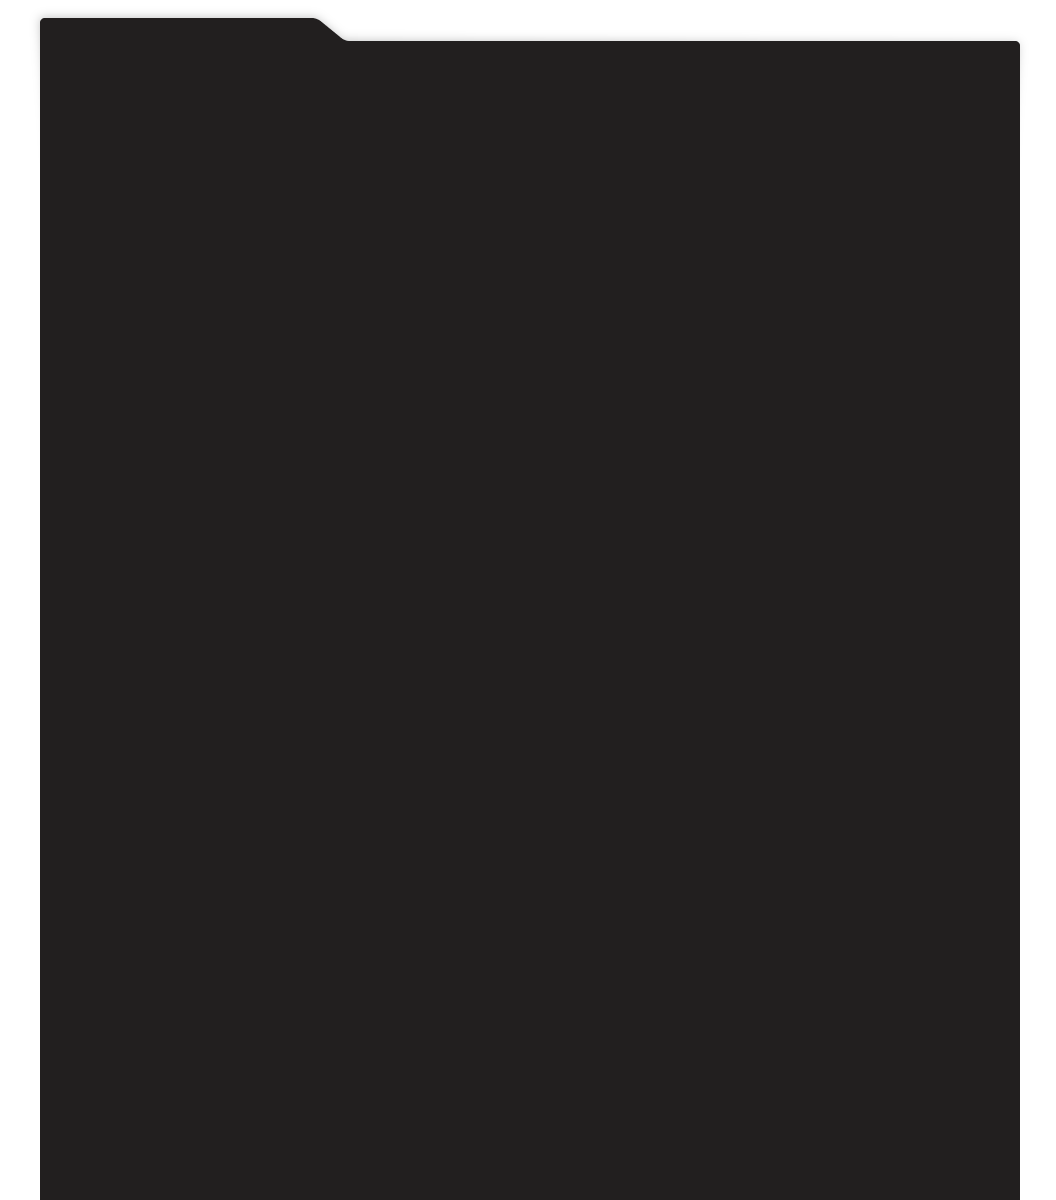
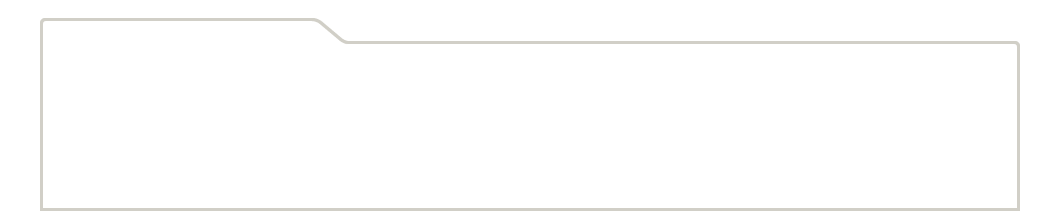
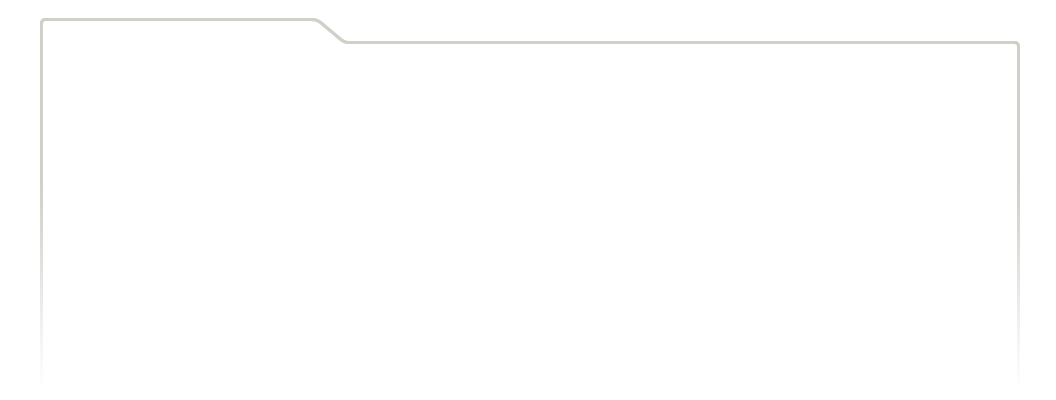
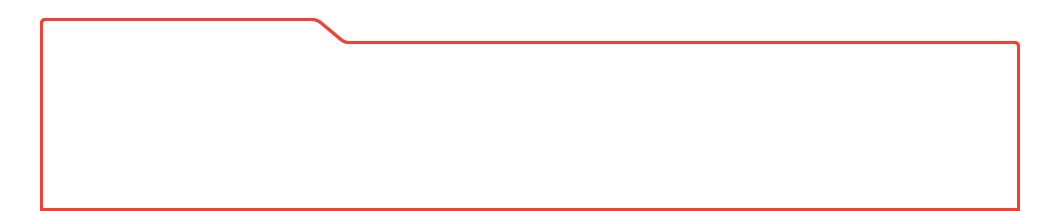
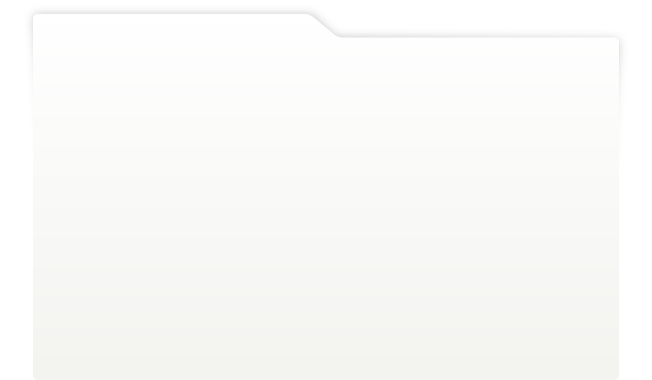
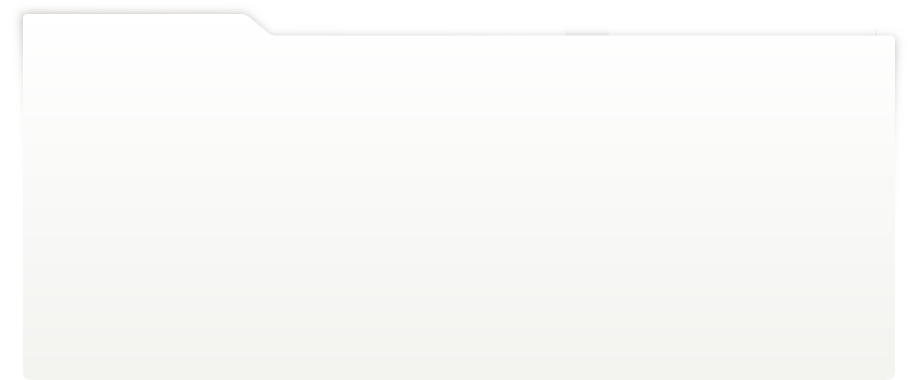
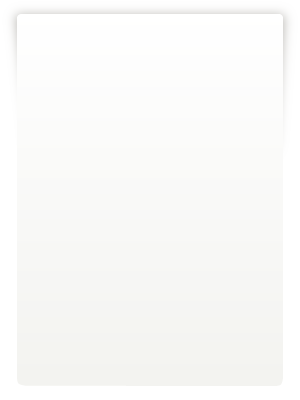
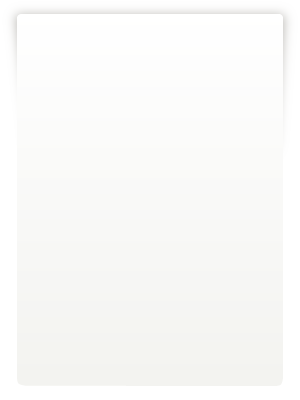
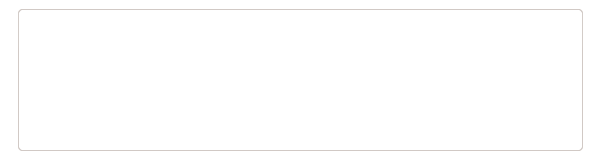
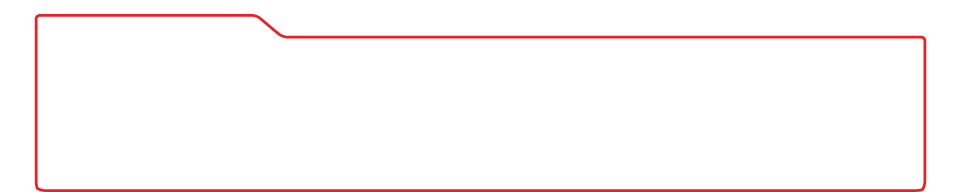
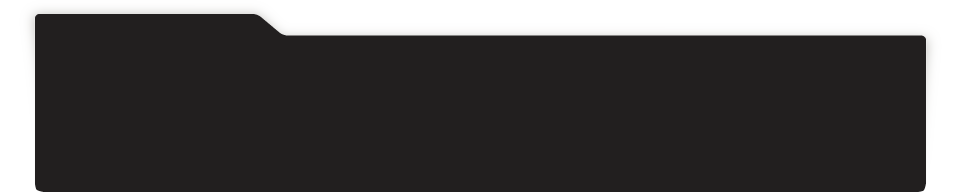
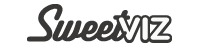
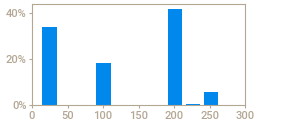
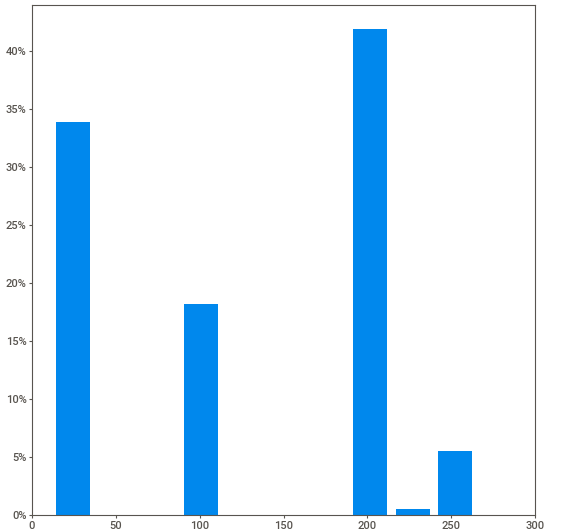
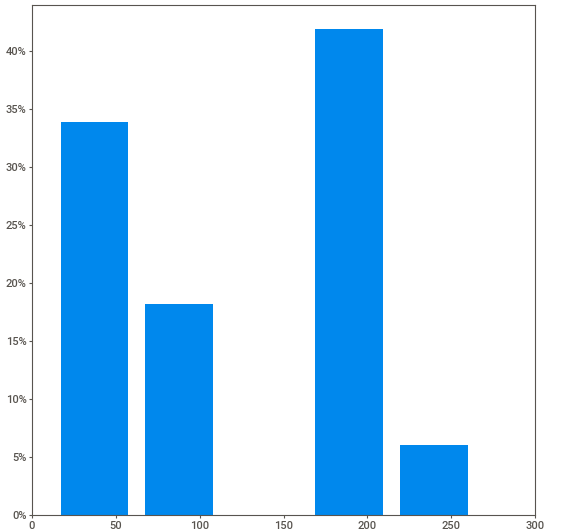
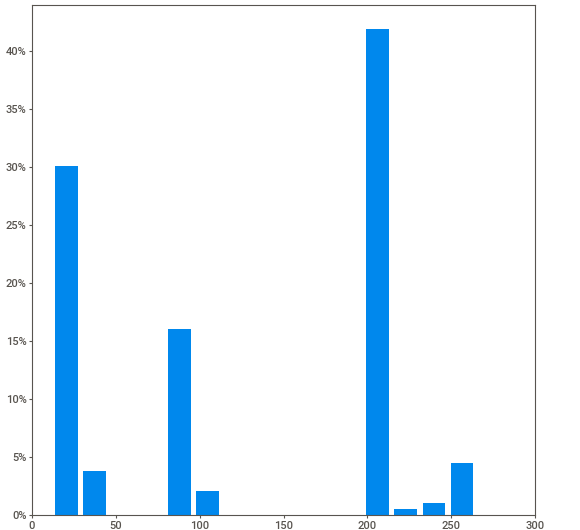
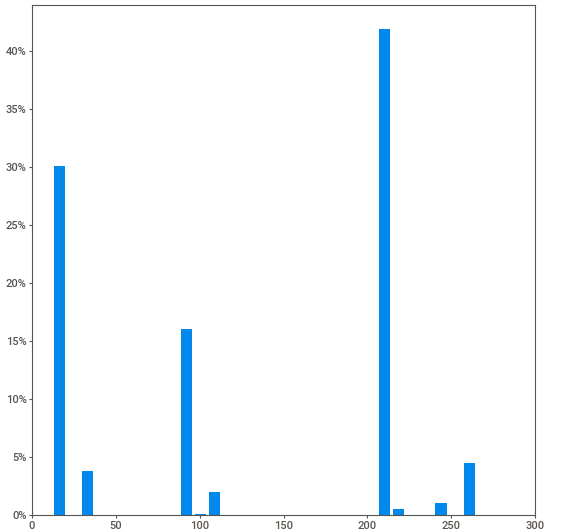
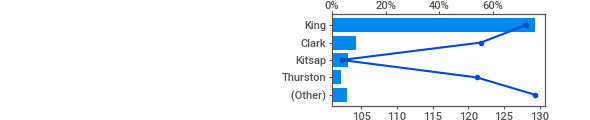
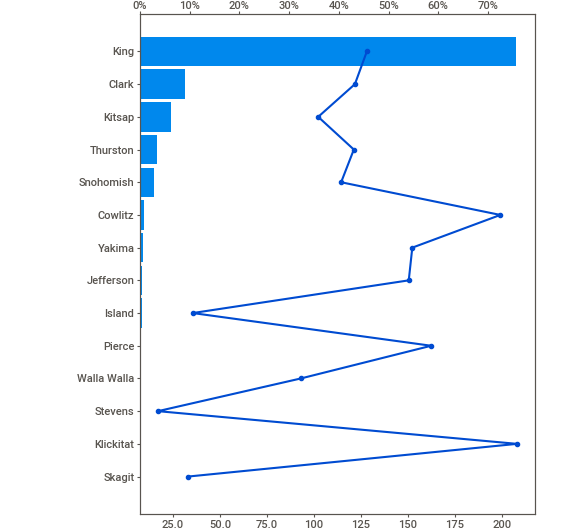
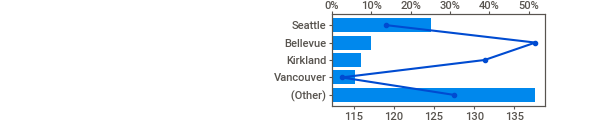
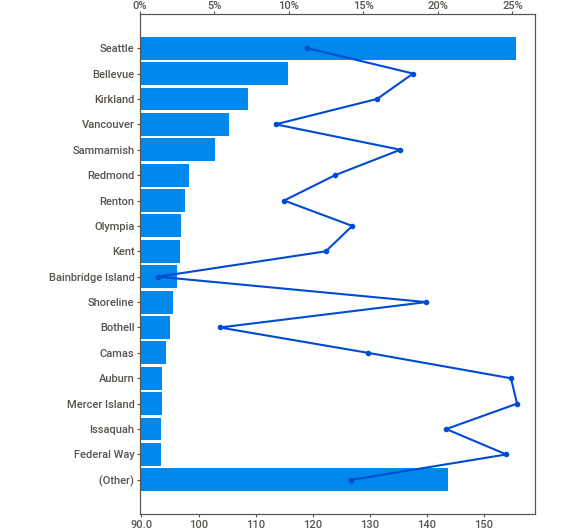
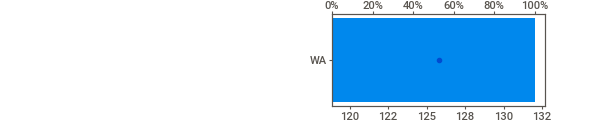
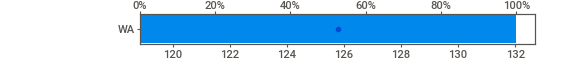
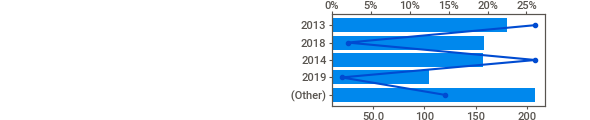
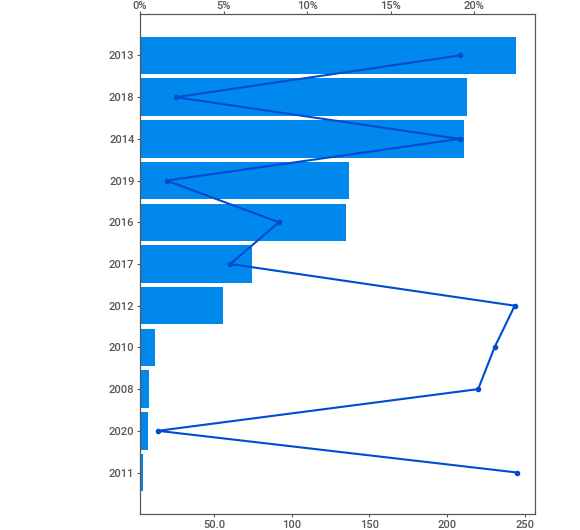
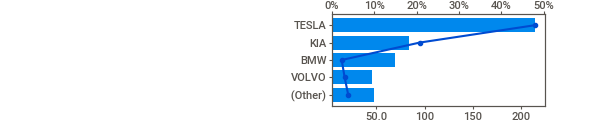
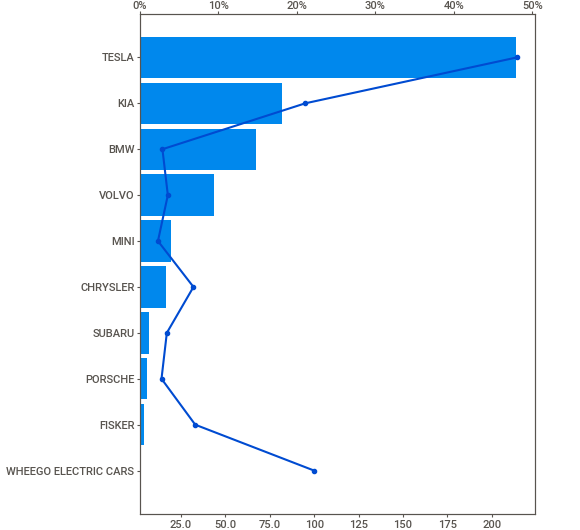
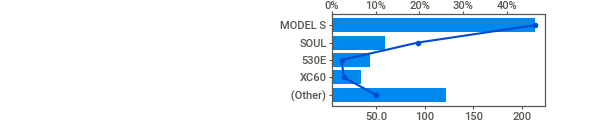
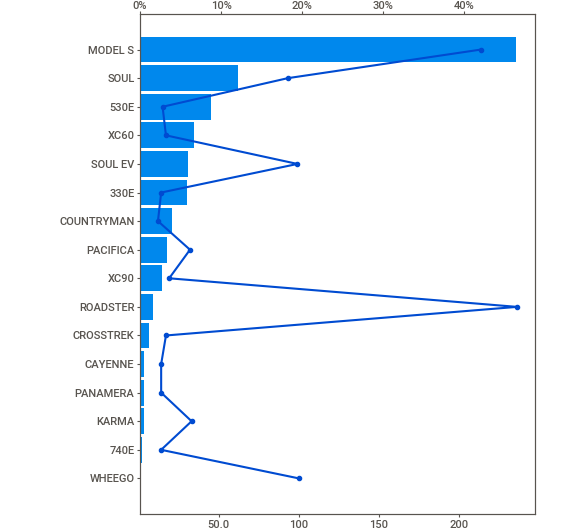
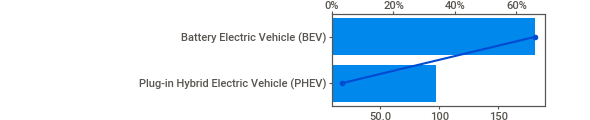
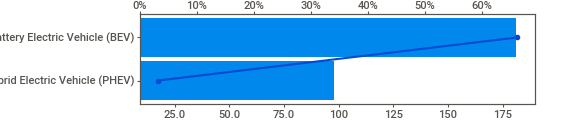
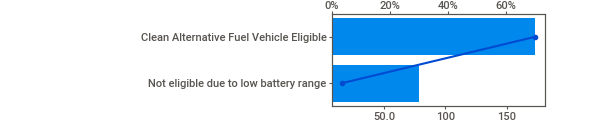
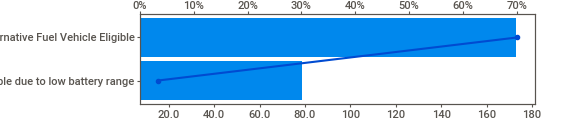
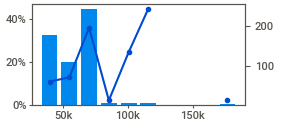
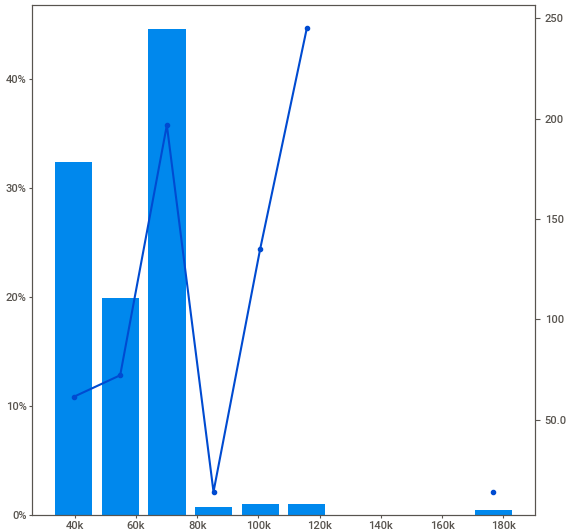
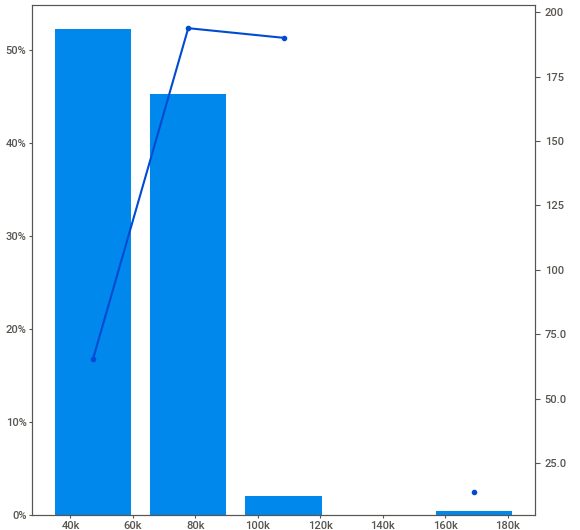
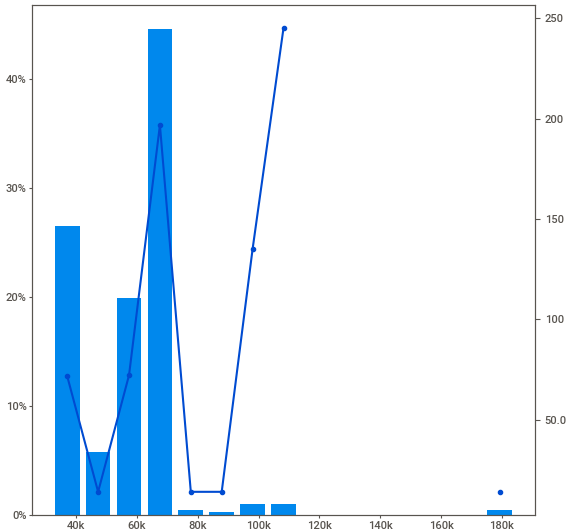
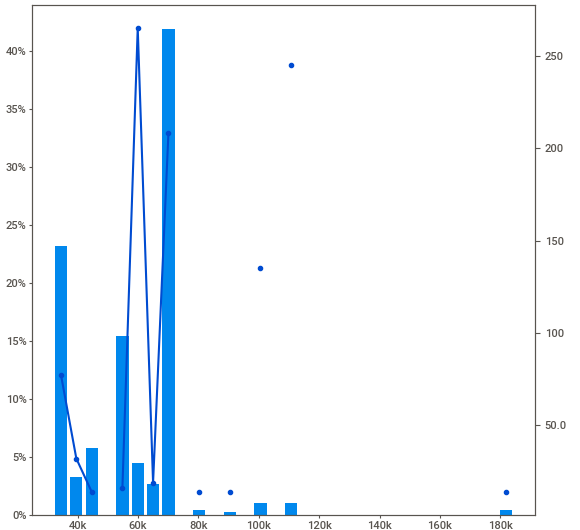
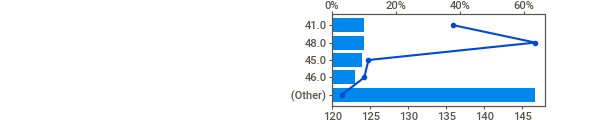
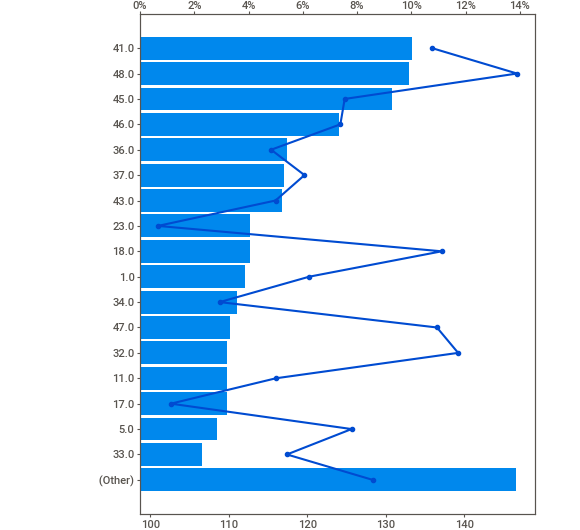
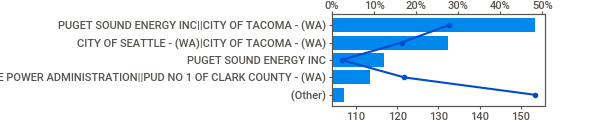
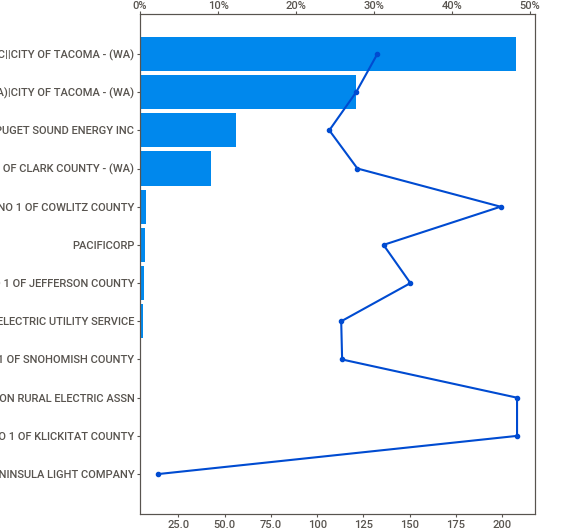
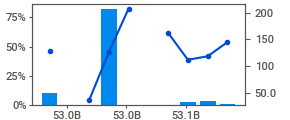
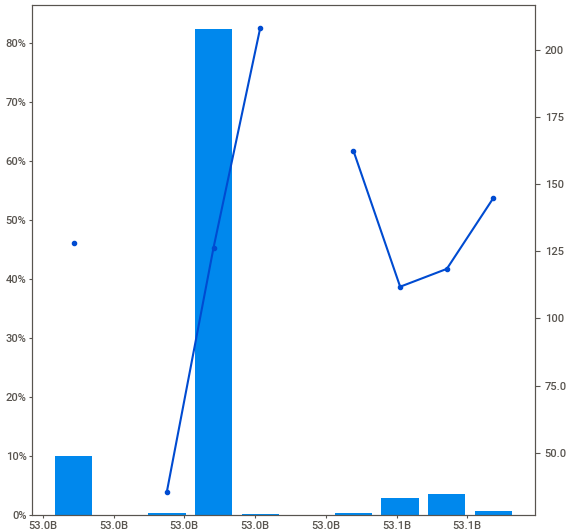
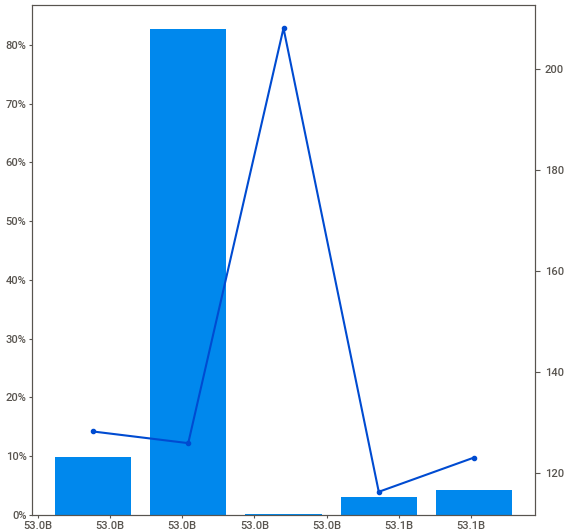
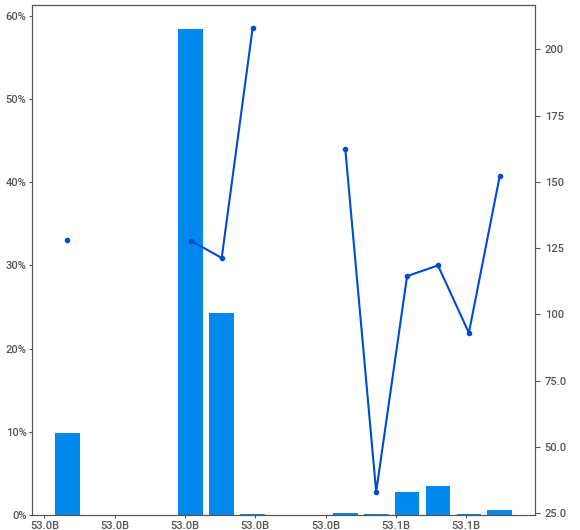
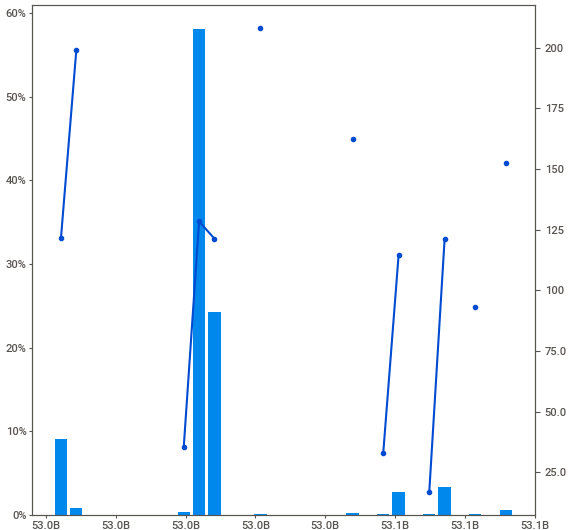
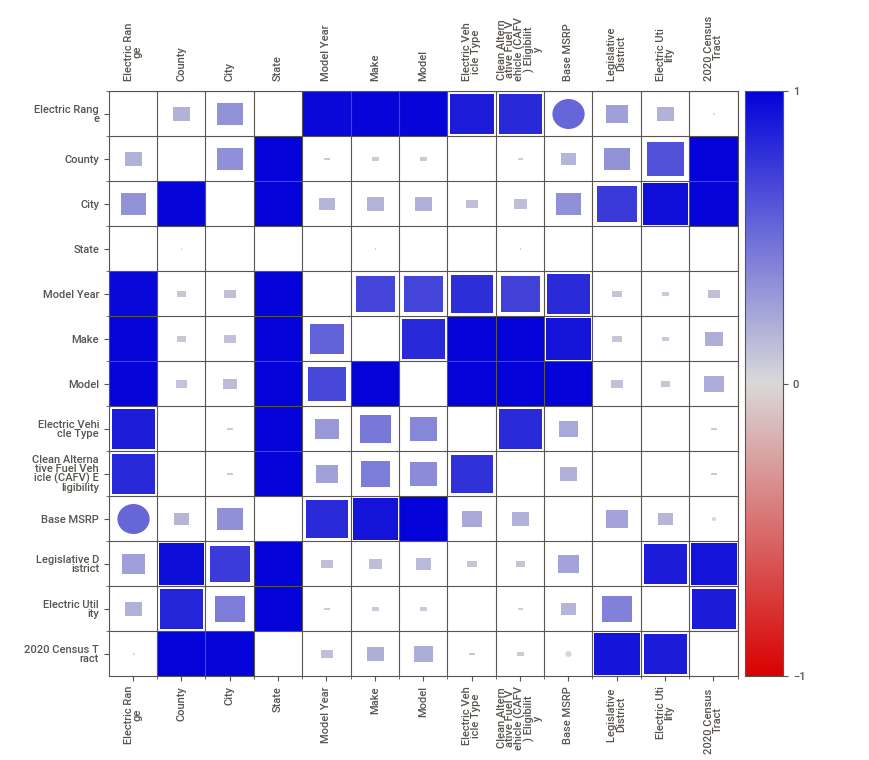
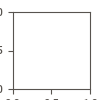

In [ ]:
ev_analysis= sv.analyze(ev_2, target_feat= 'Electric Range')
ev_analysis.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


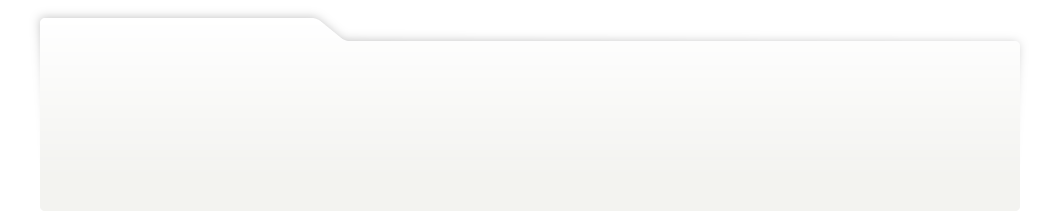
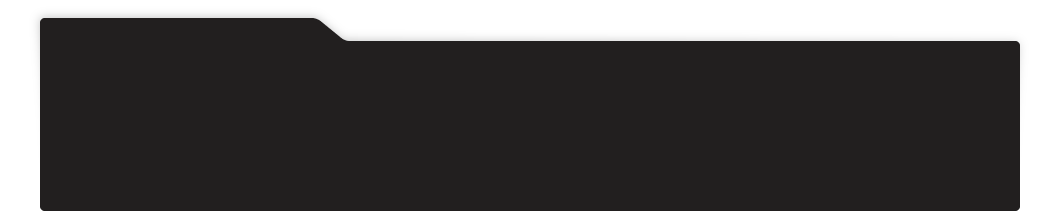
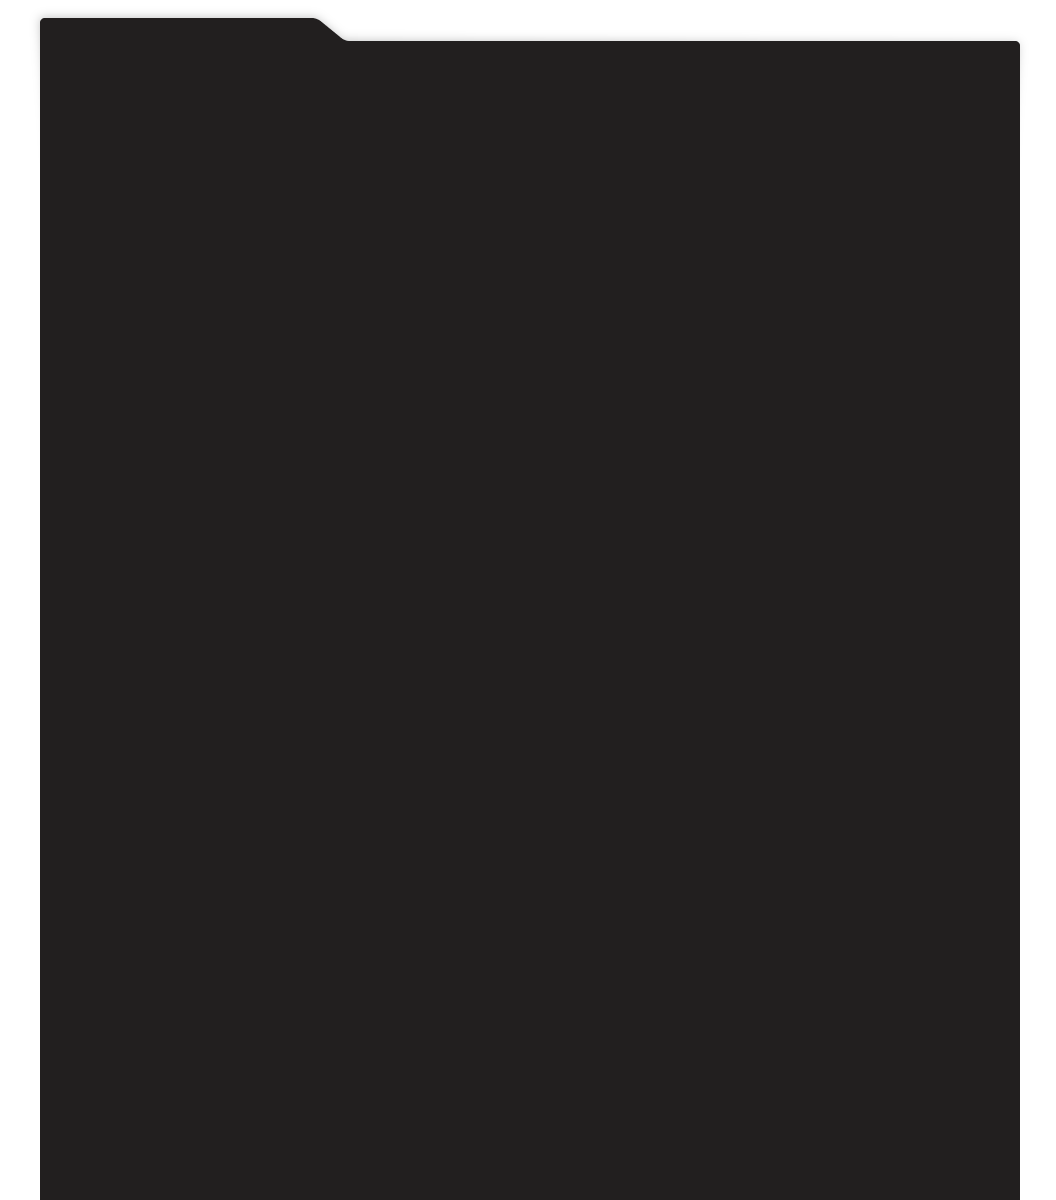
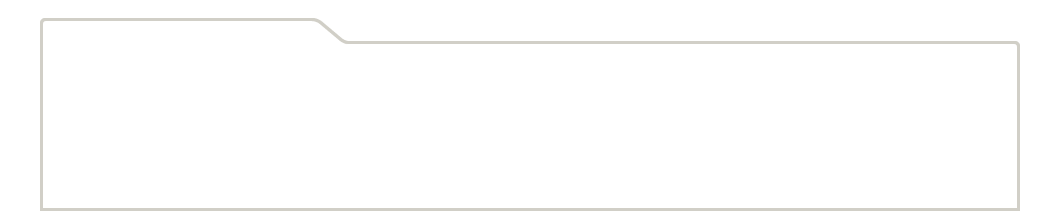
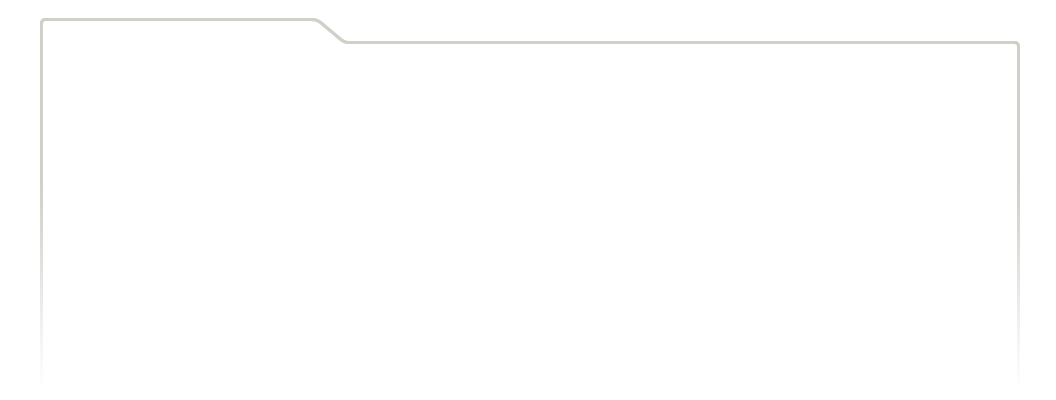
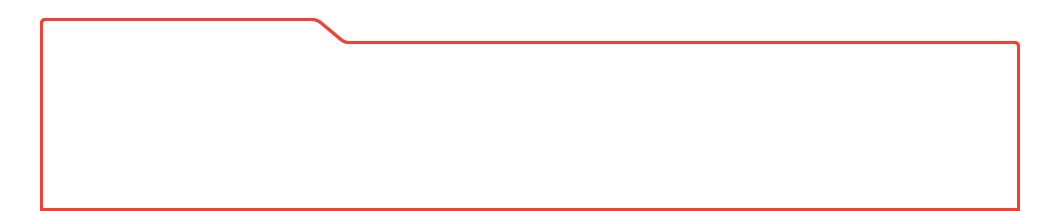
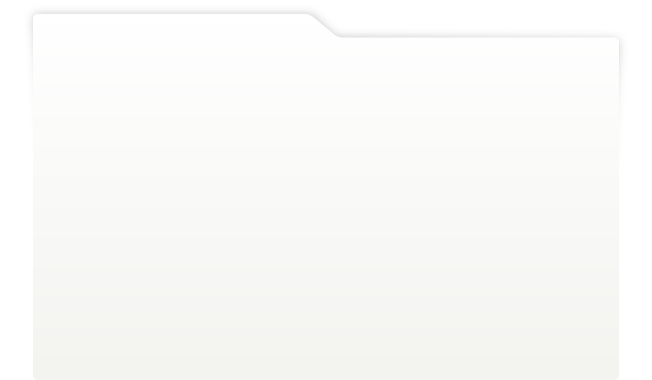
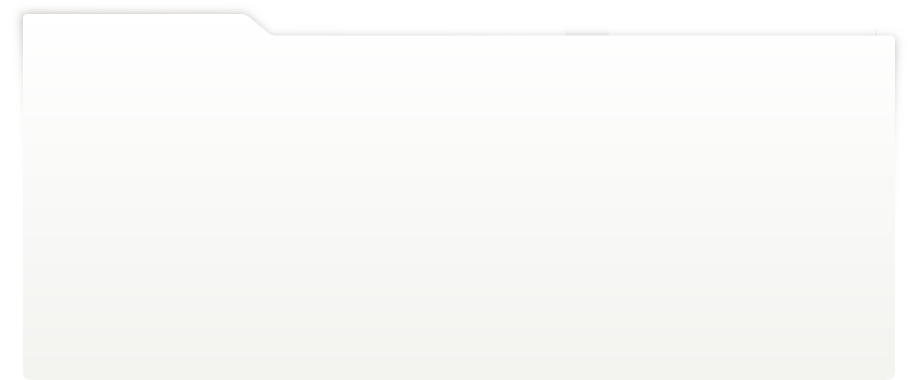
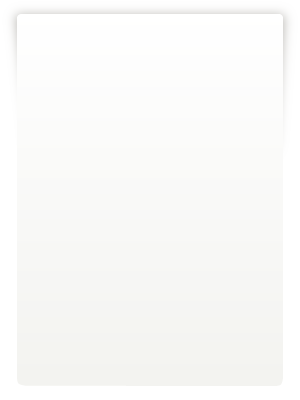
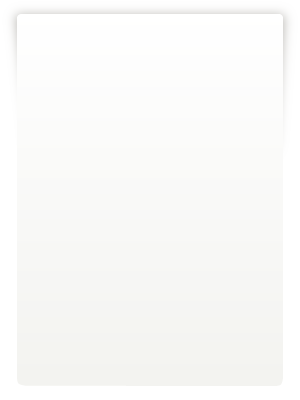
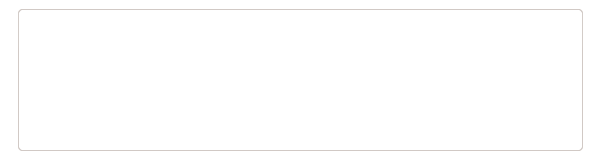
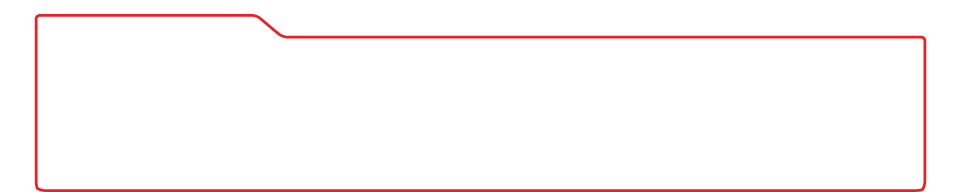
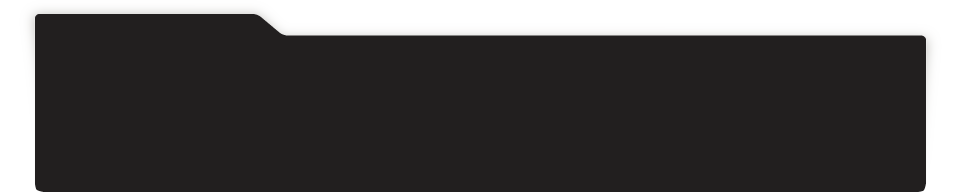
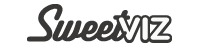
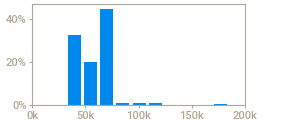
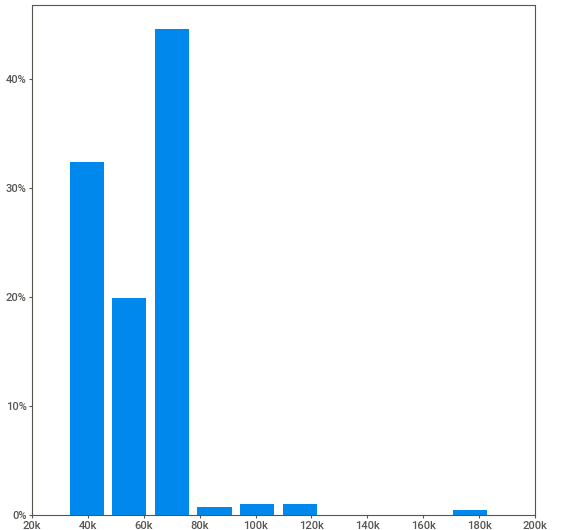
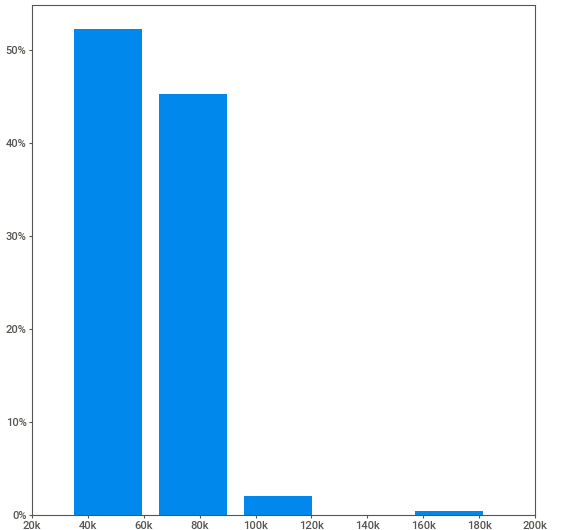
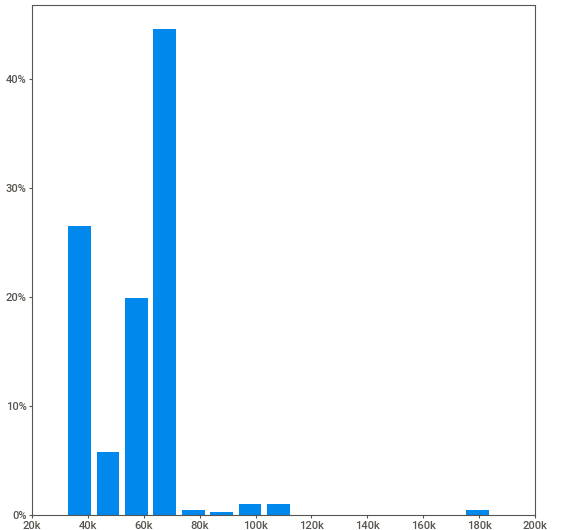
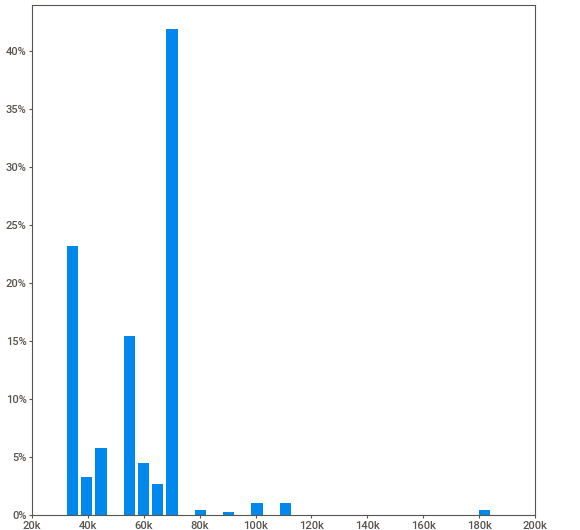
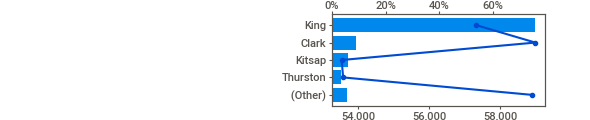
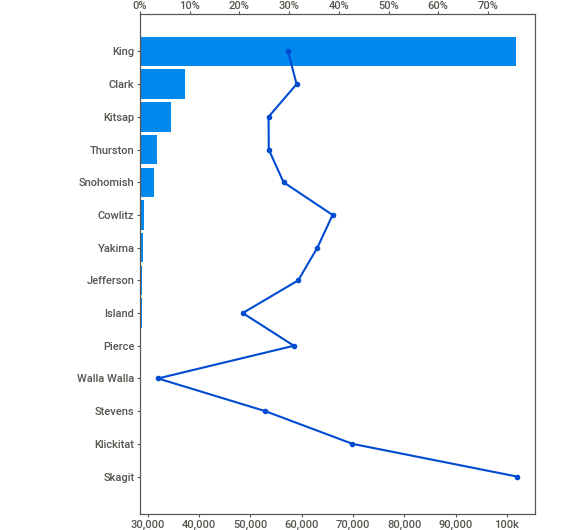
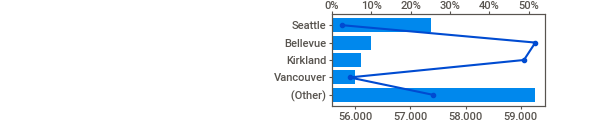
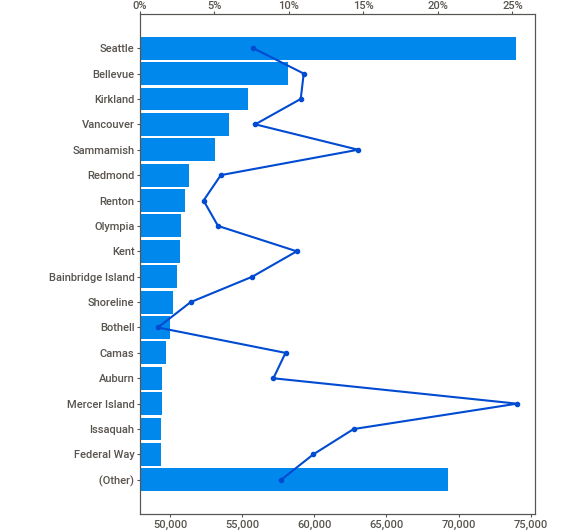
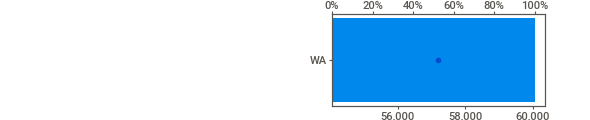
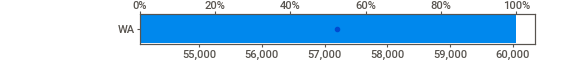
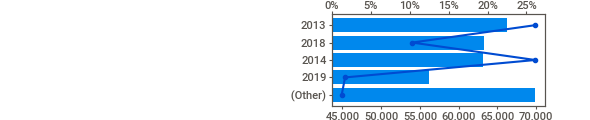
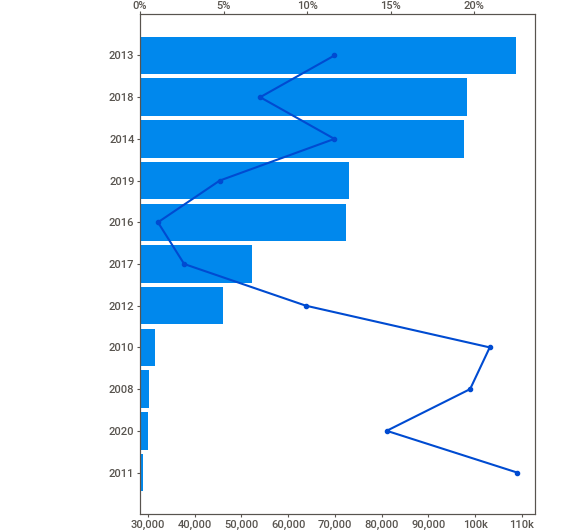
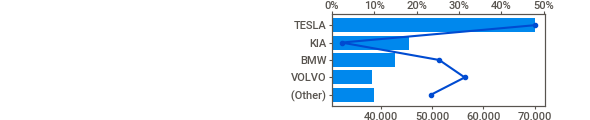
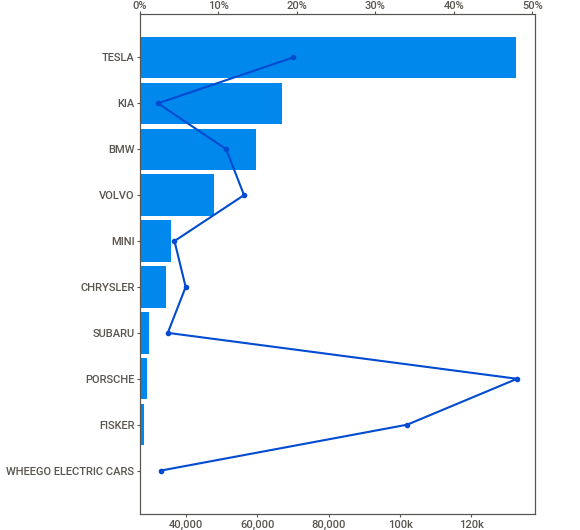
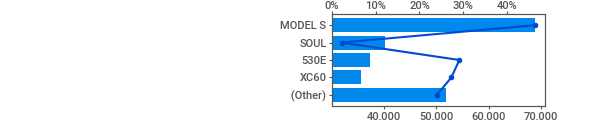
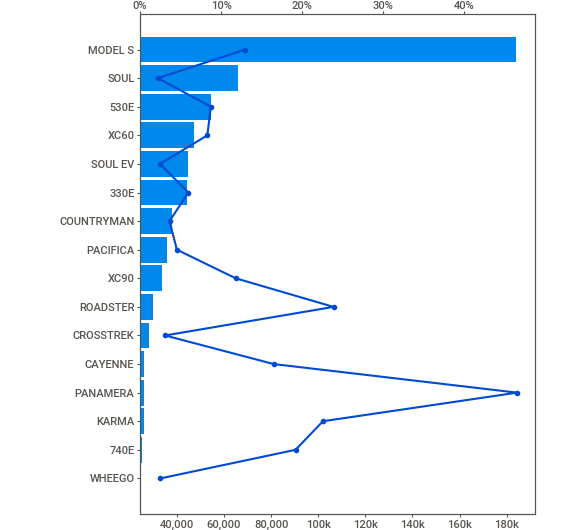
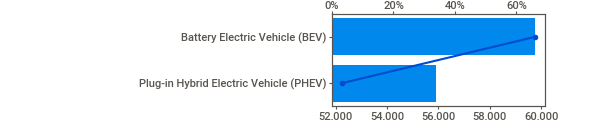
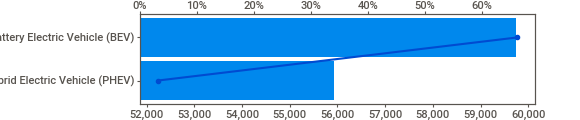
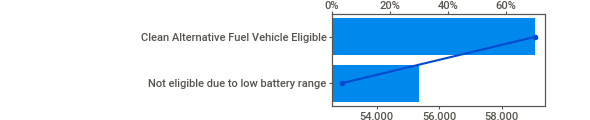
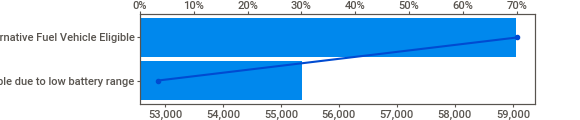
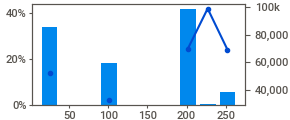
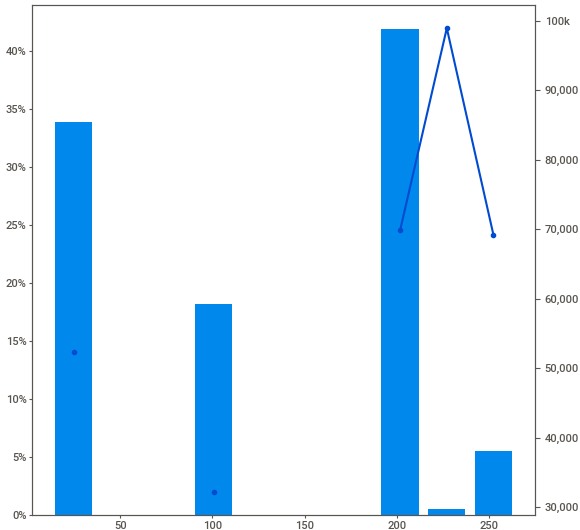
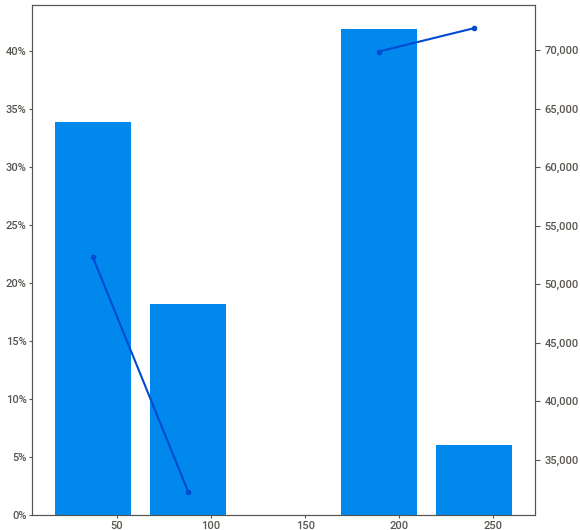
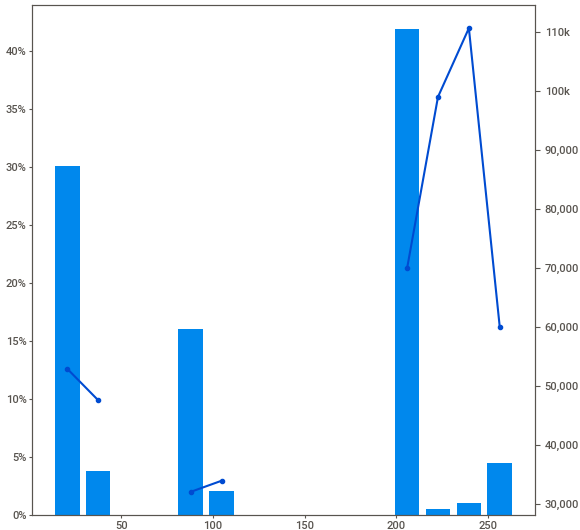
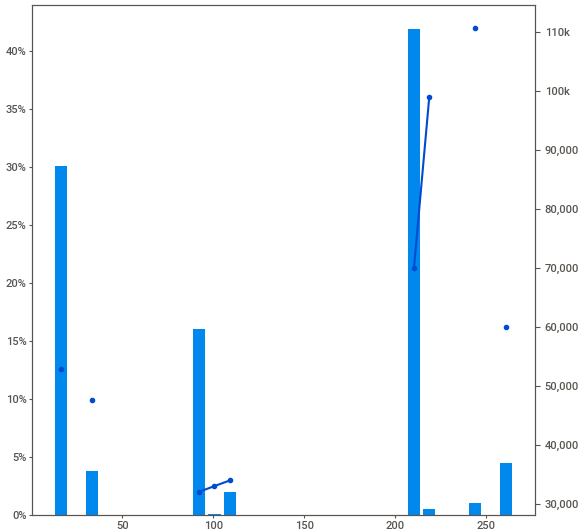
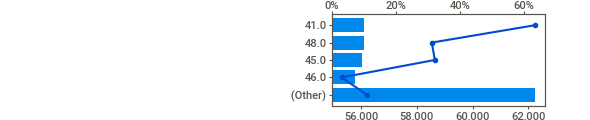
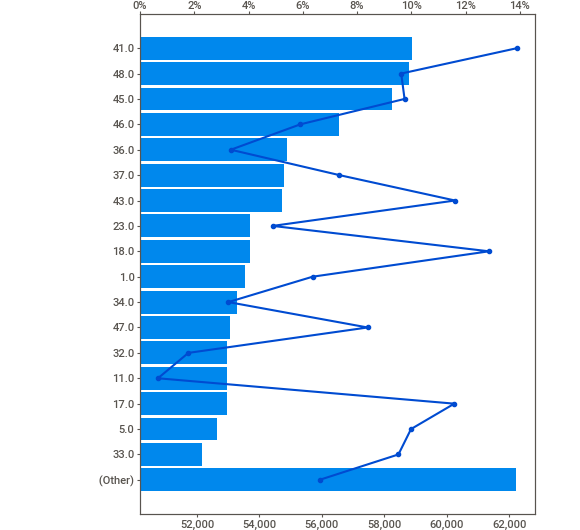
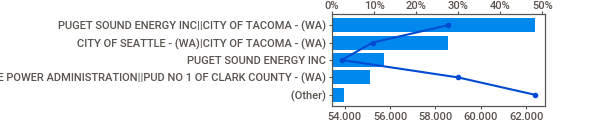
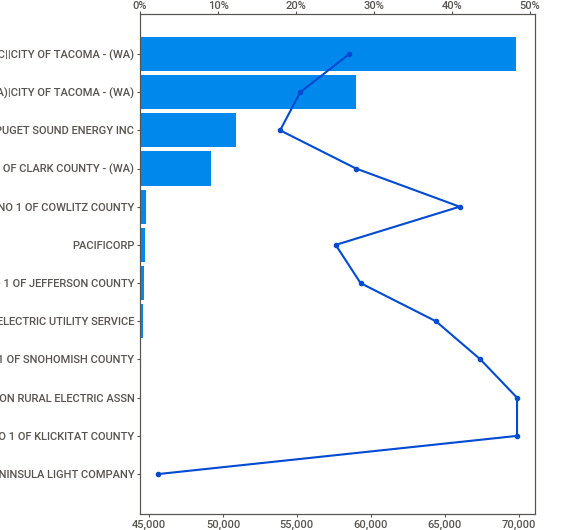
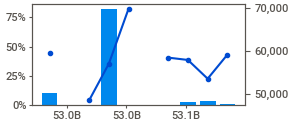
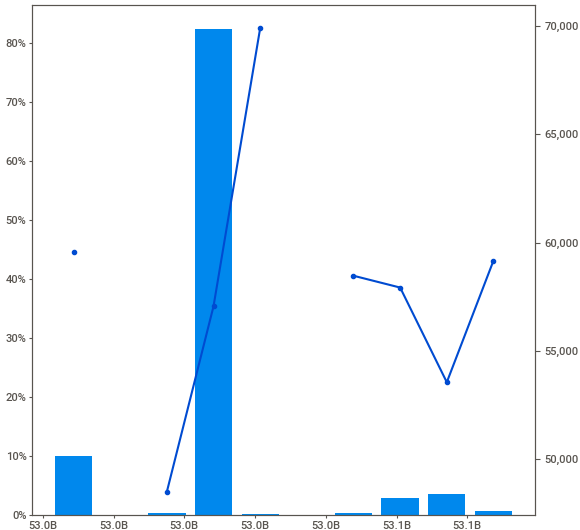
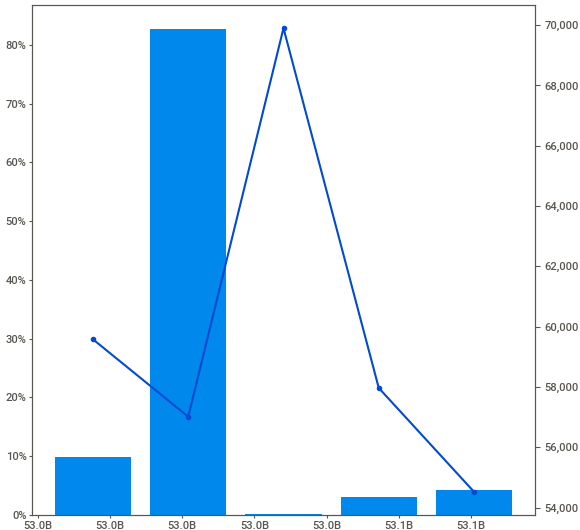
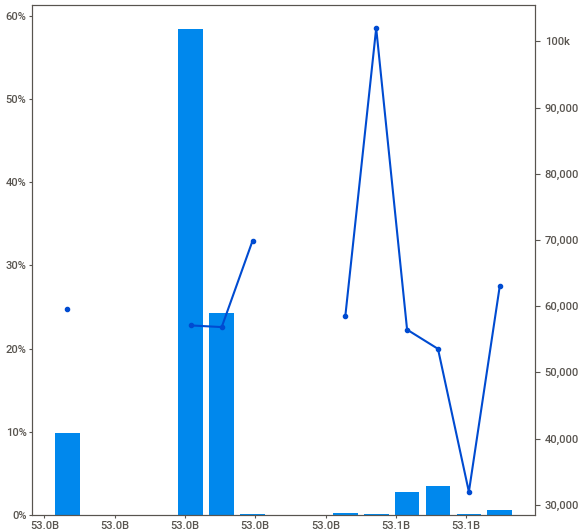
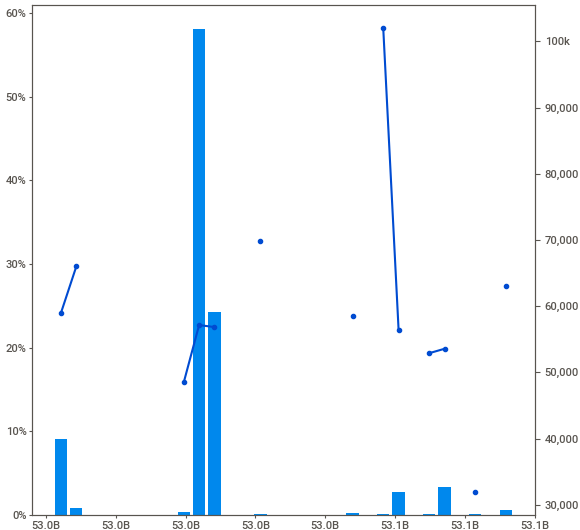
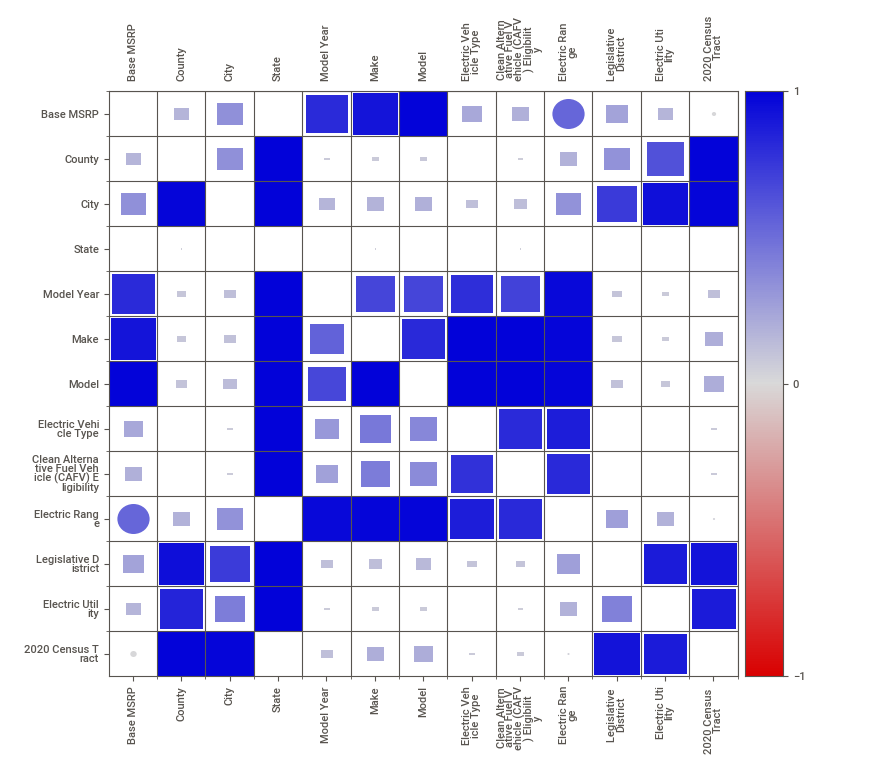
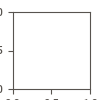

In [ ]:
ev_analysis= sv.analyze(ev_2, target_feat= 'Base MSRP')
ev_analysis.show_notebook()

In [ ]:
intra_report = sv.compare_intra(ev_2, ev_2['City'],['Base MSRP', 'City'])

ValueError: ignored

In [ ]:
city_condition = ev_2['City'].isin(['Seattle'])
intra_report = sv.compare_intra(ev_2, city_condition, ['Seattle', 'Others'])

                                             |          | [  0%]   00:00 -> (? left)


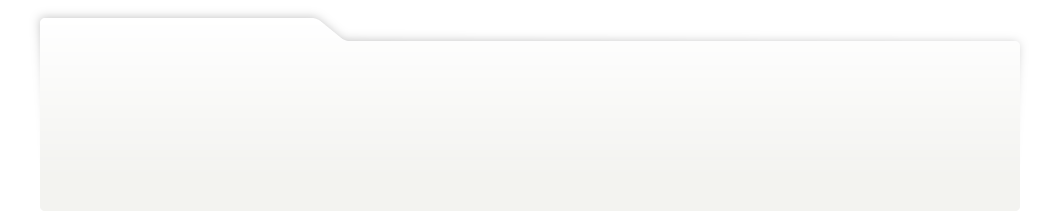
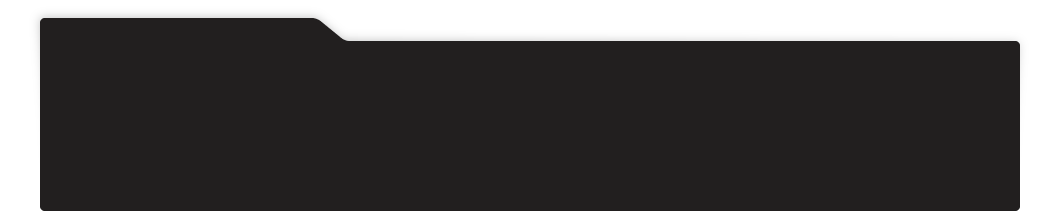
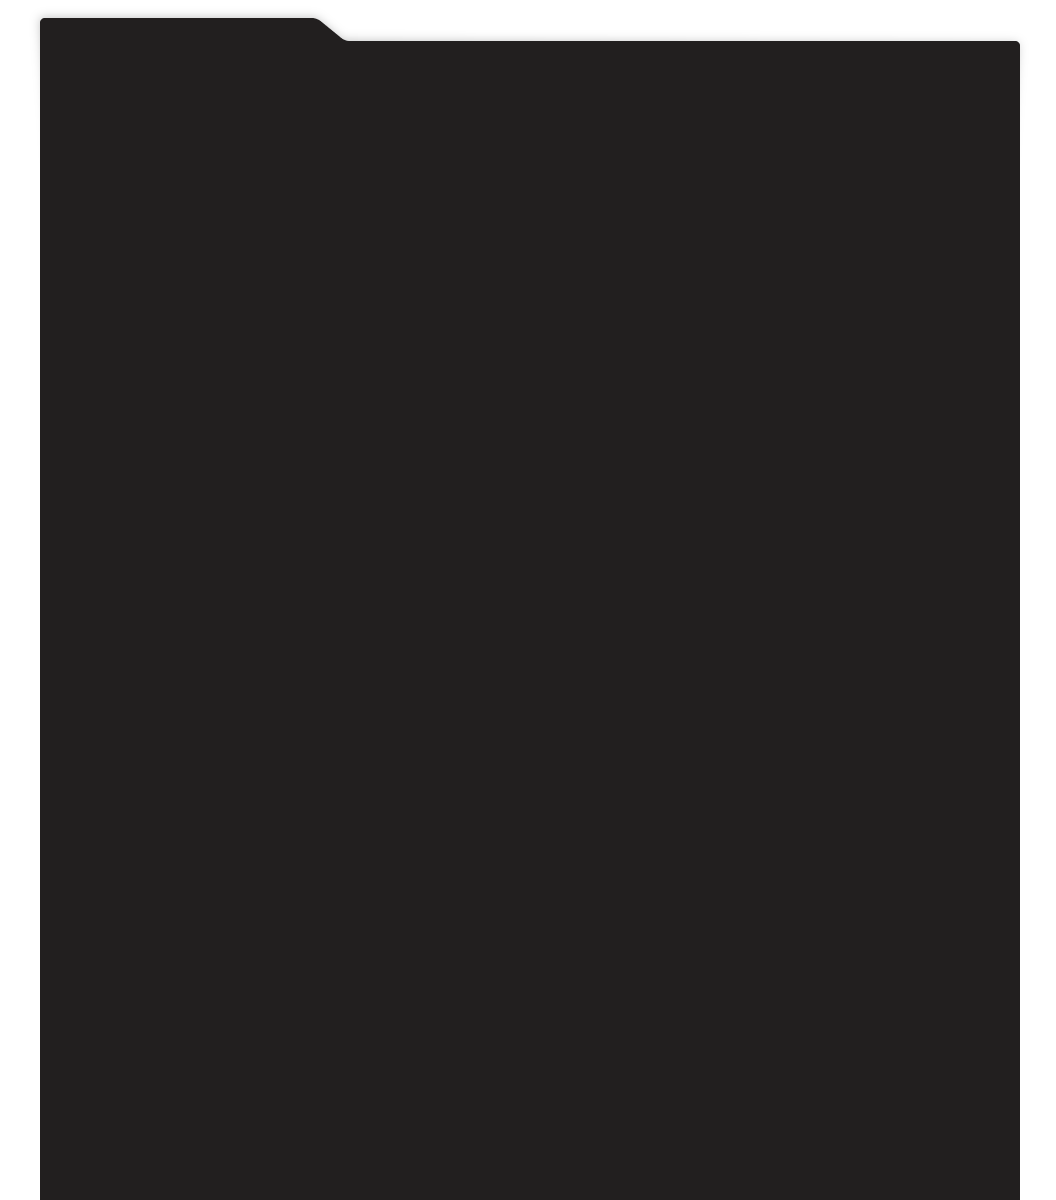
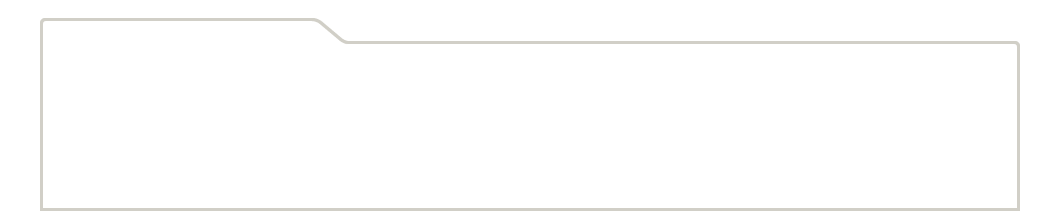
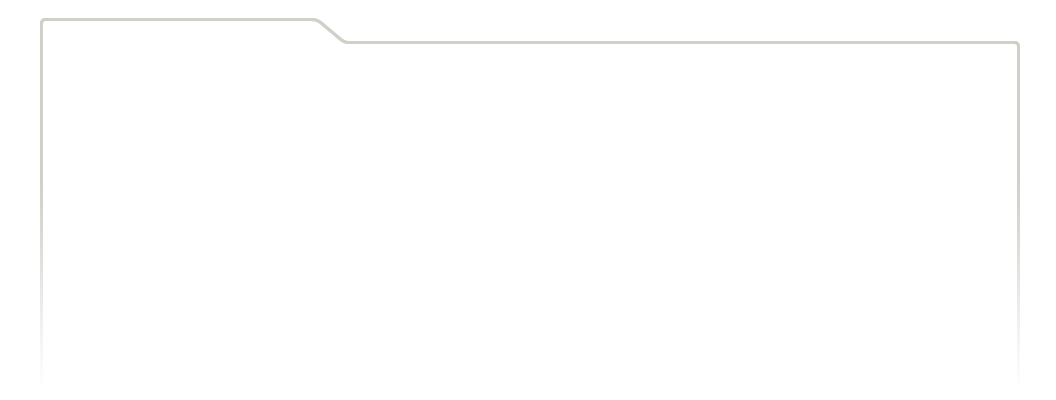
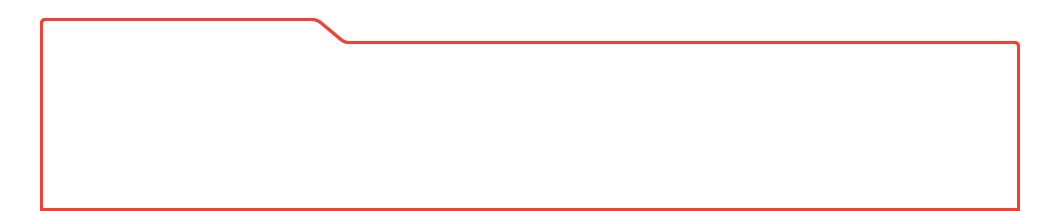
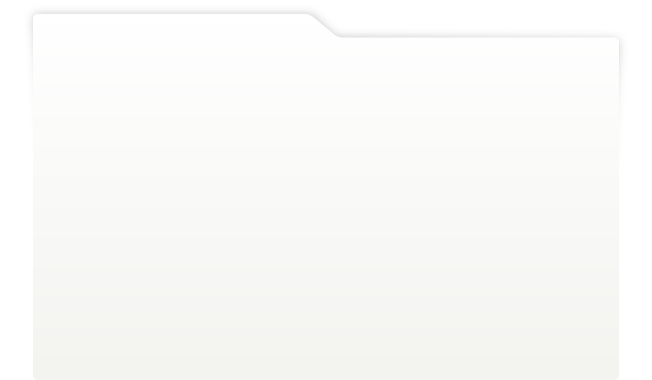
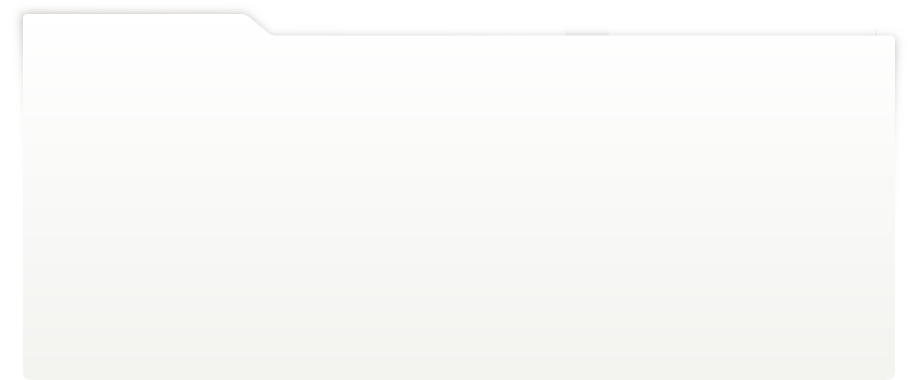
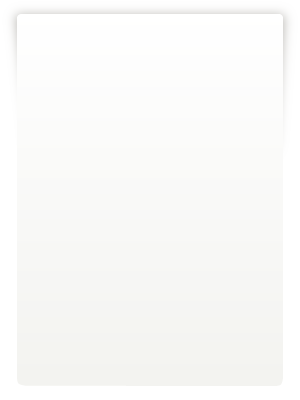
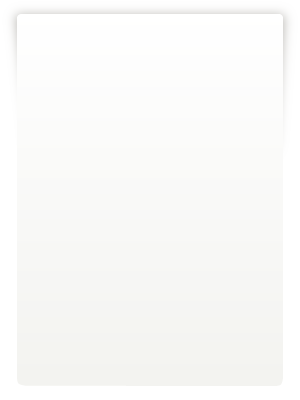
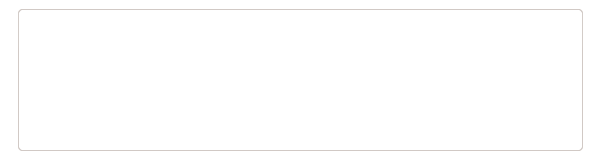
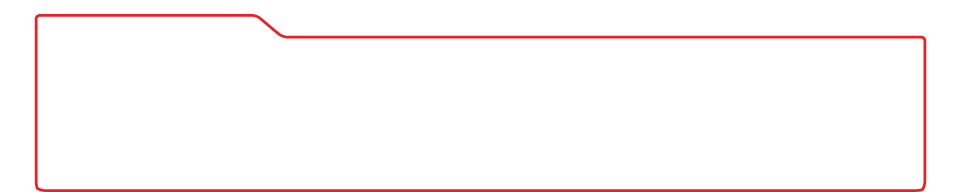
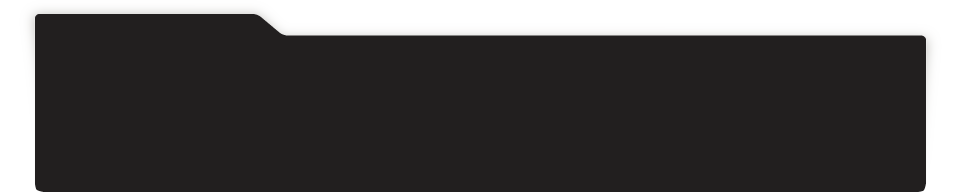
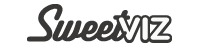
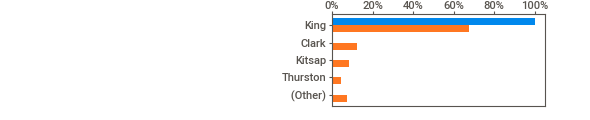
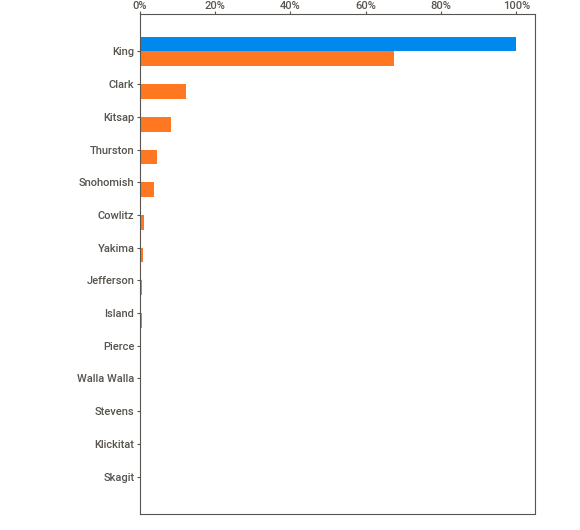
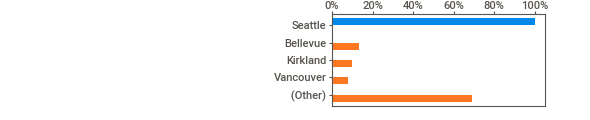
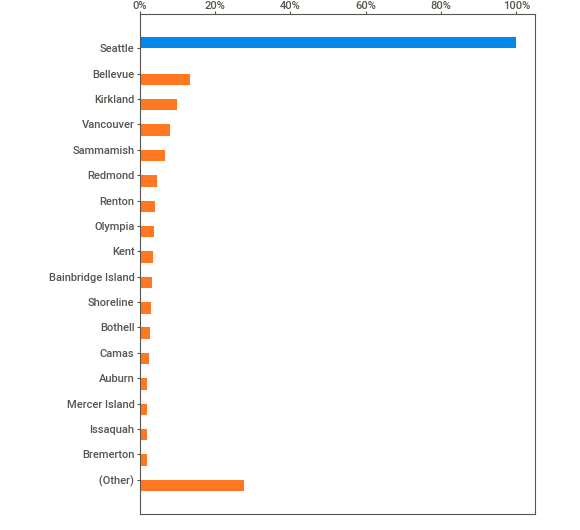
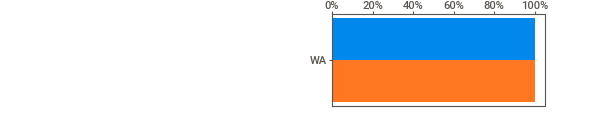
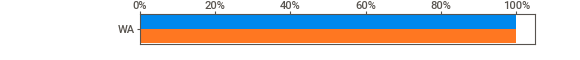
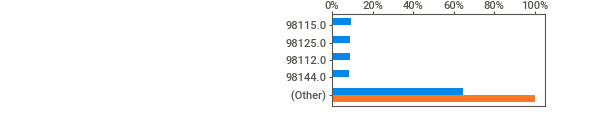
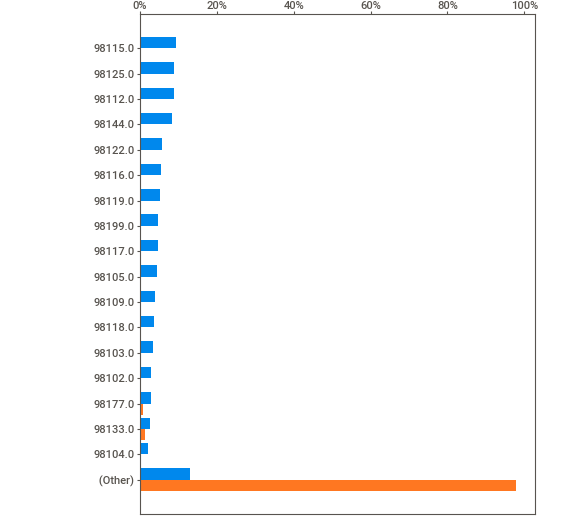
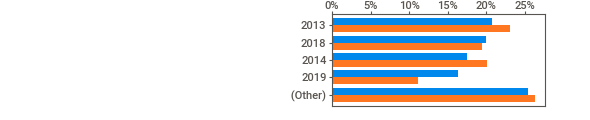
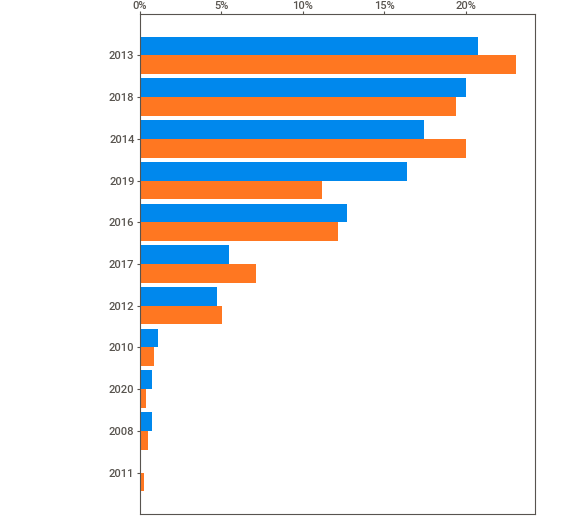
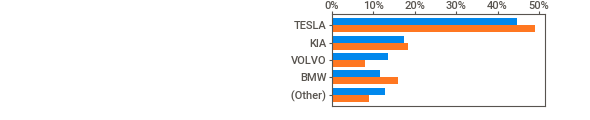
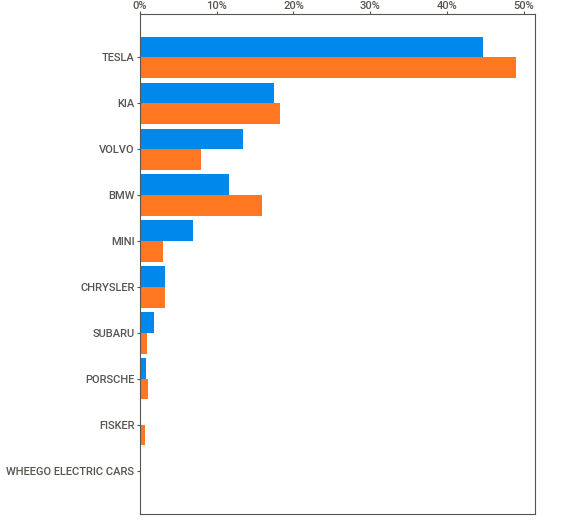
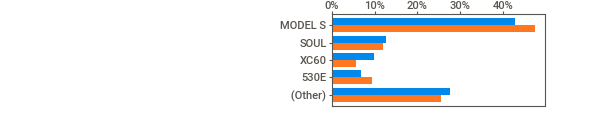
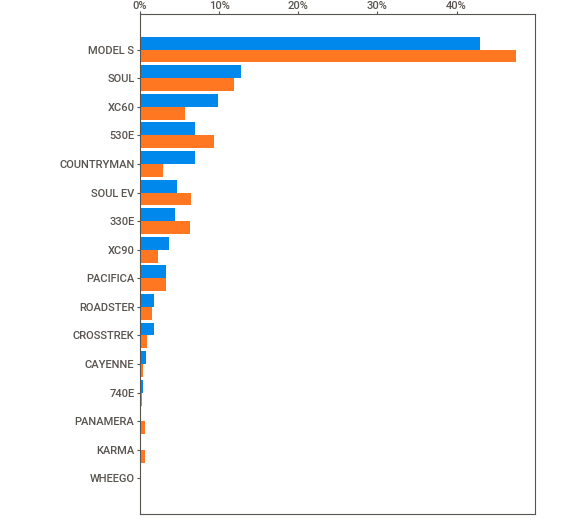
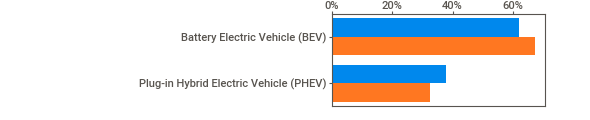
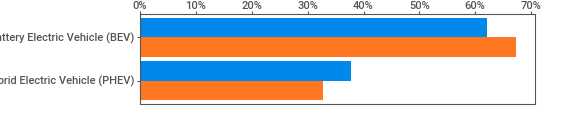
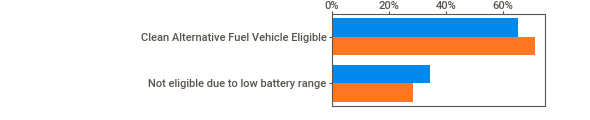
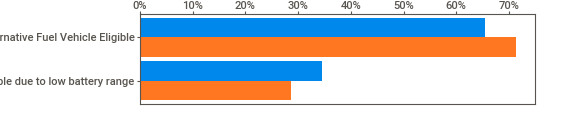
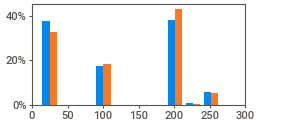
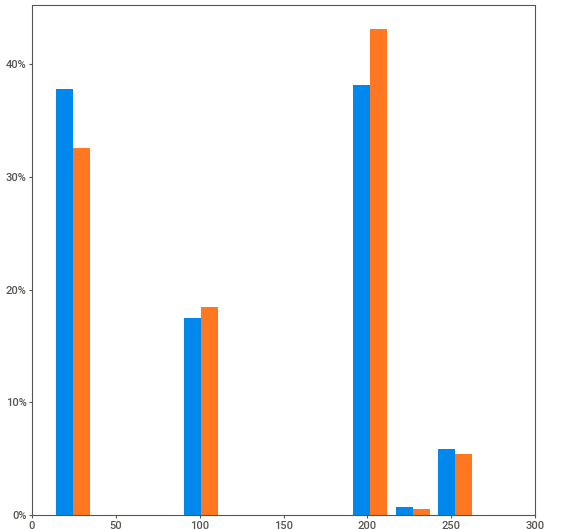
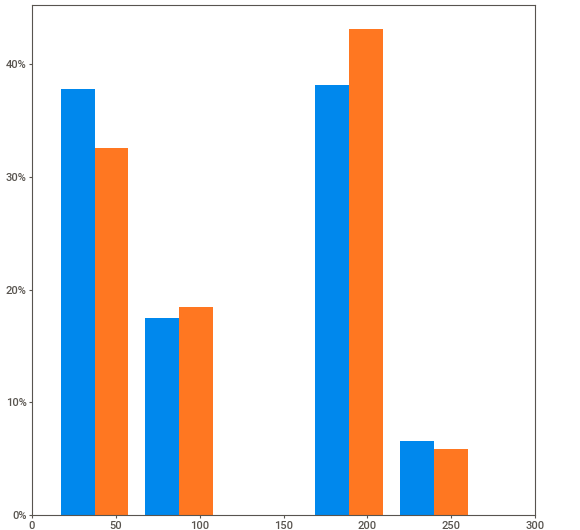
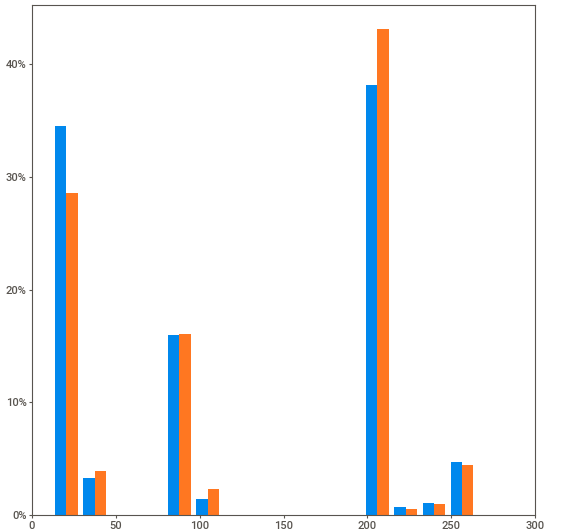
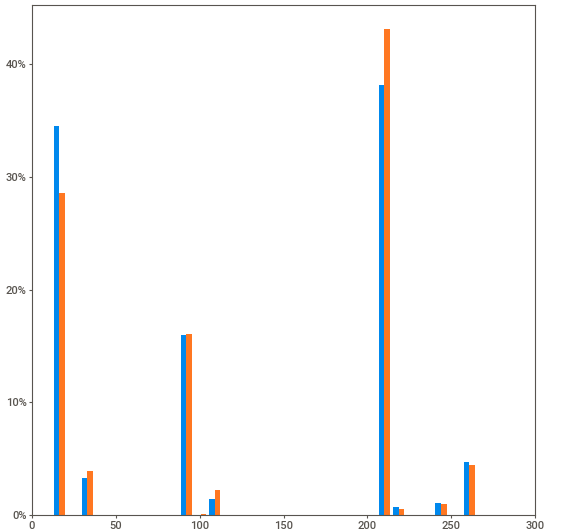
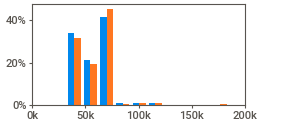
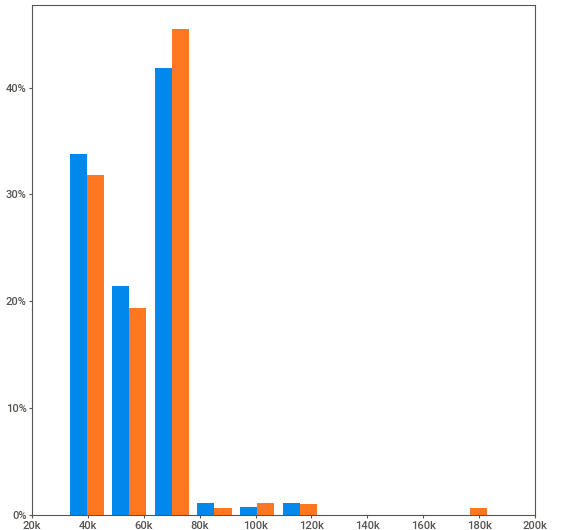
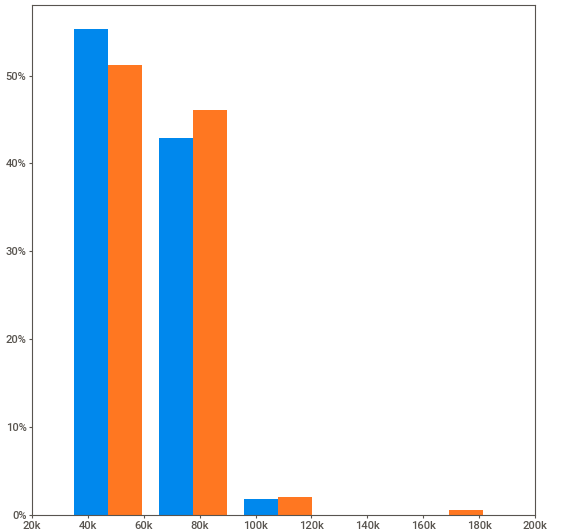
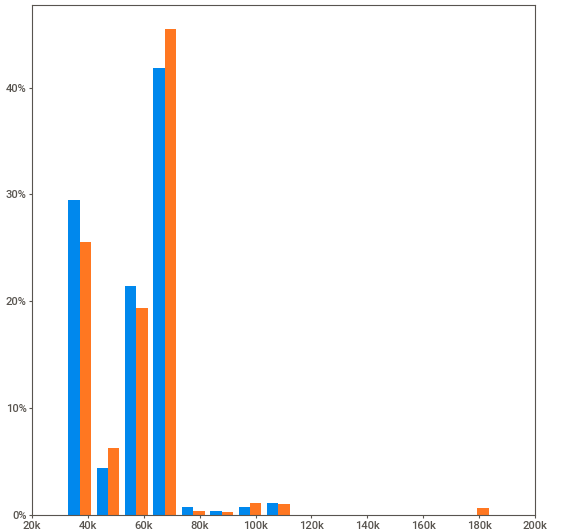
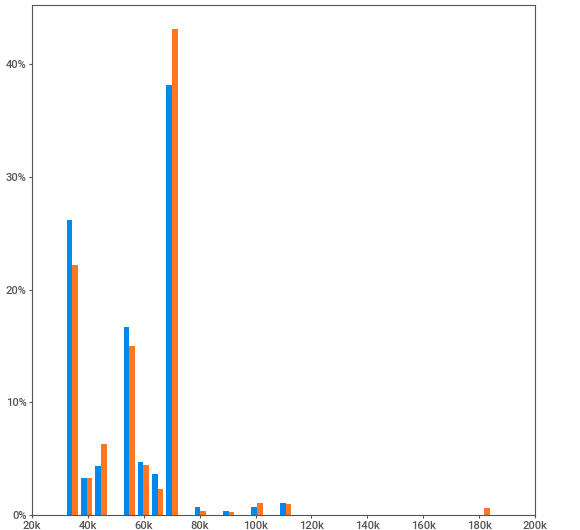
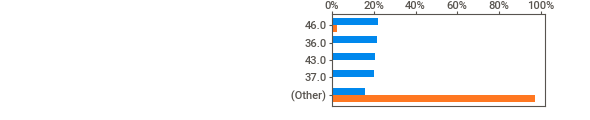
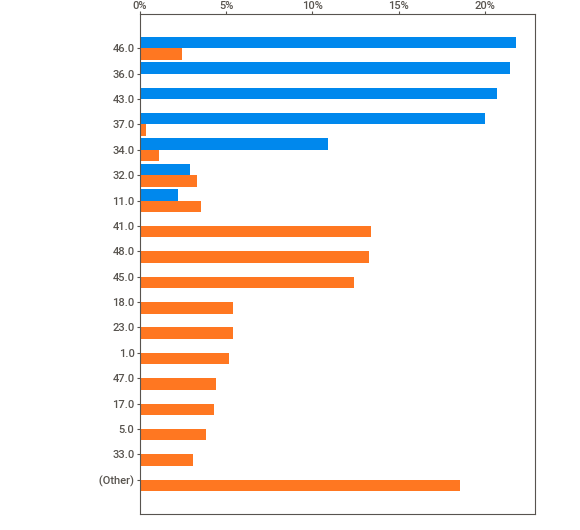
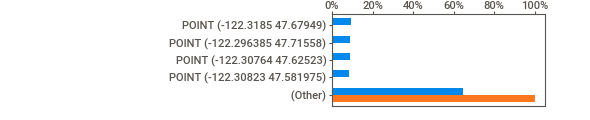
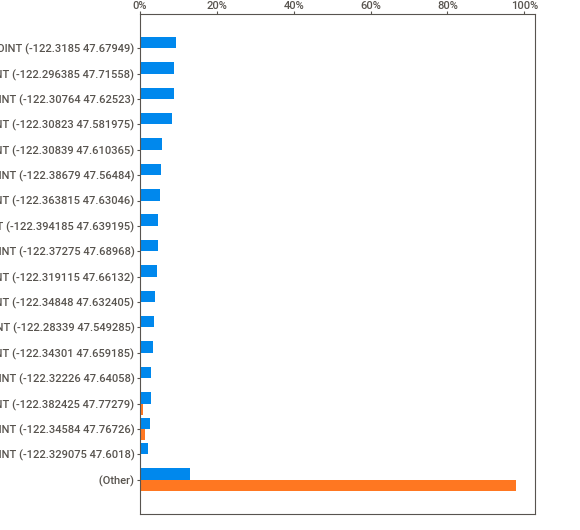
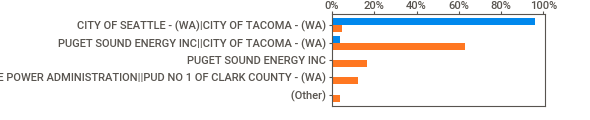
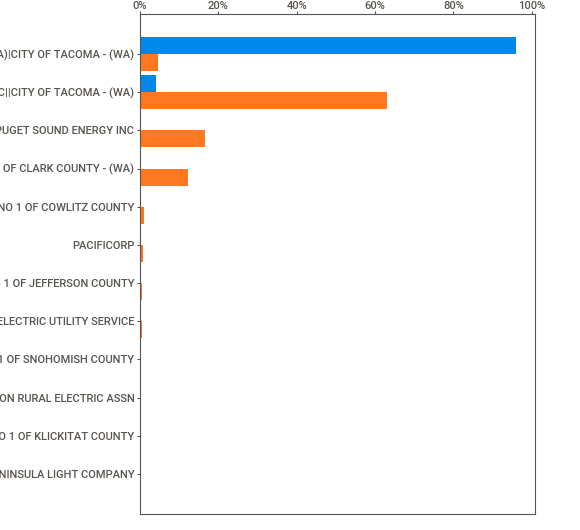
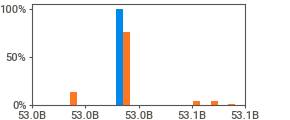
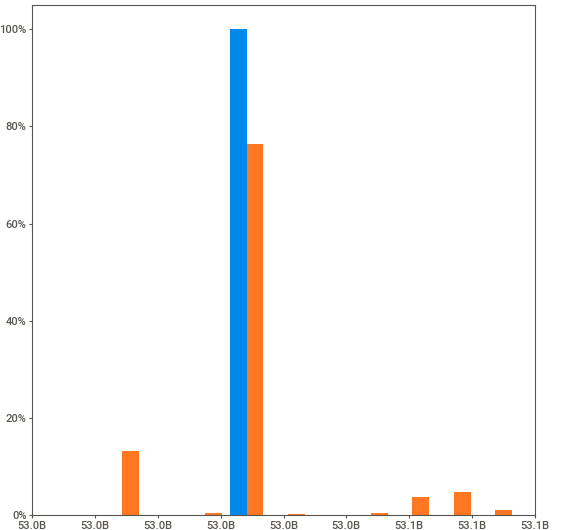
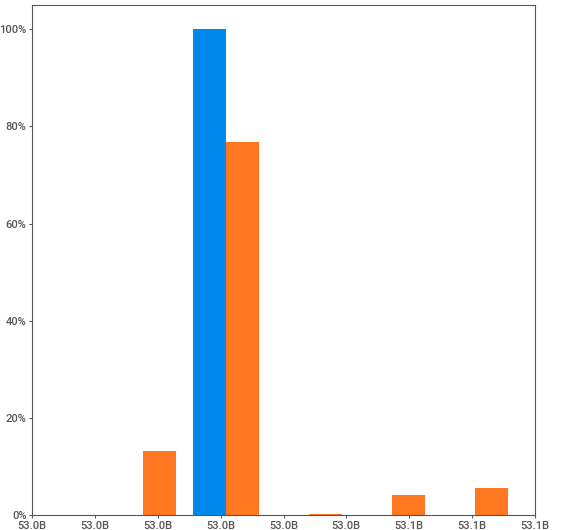
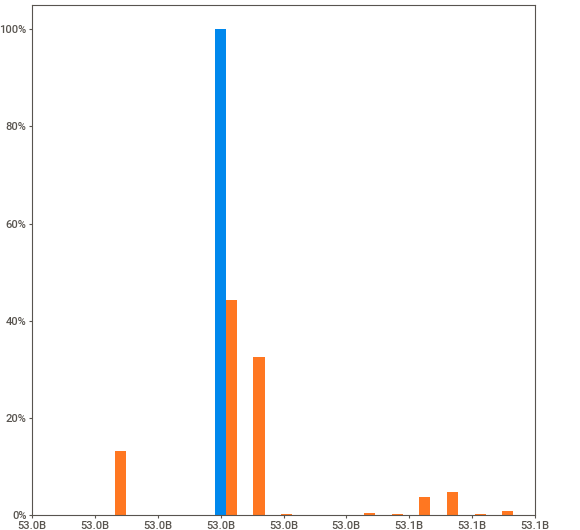
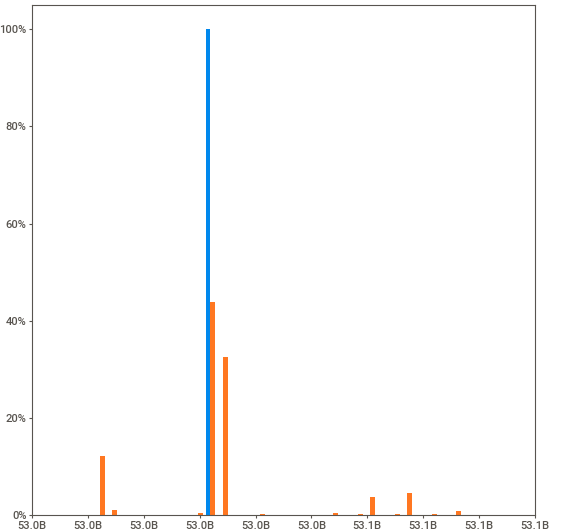
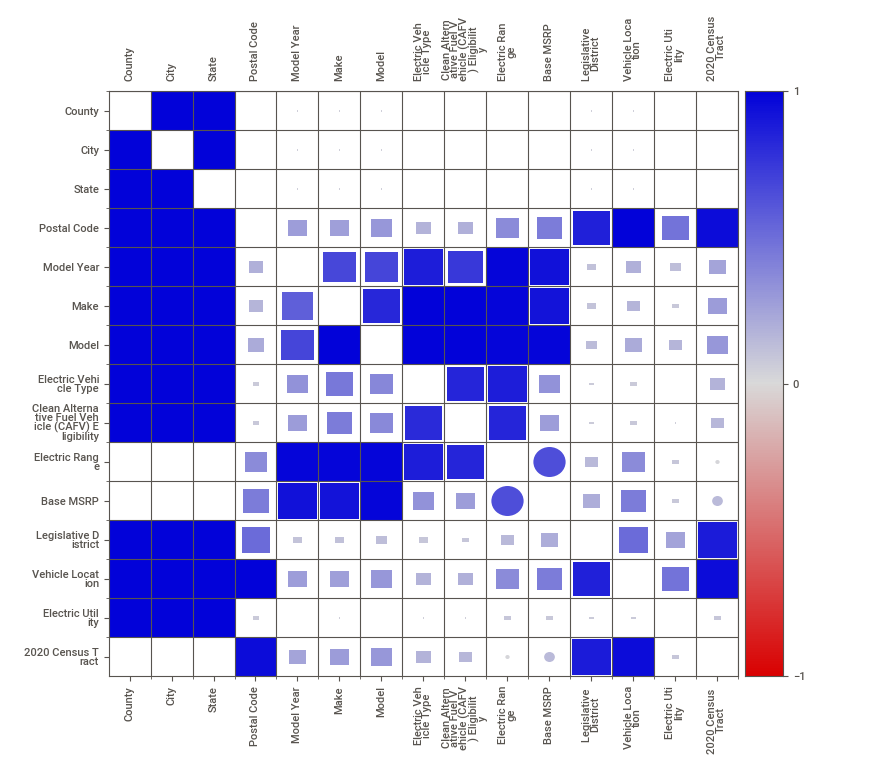
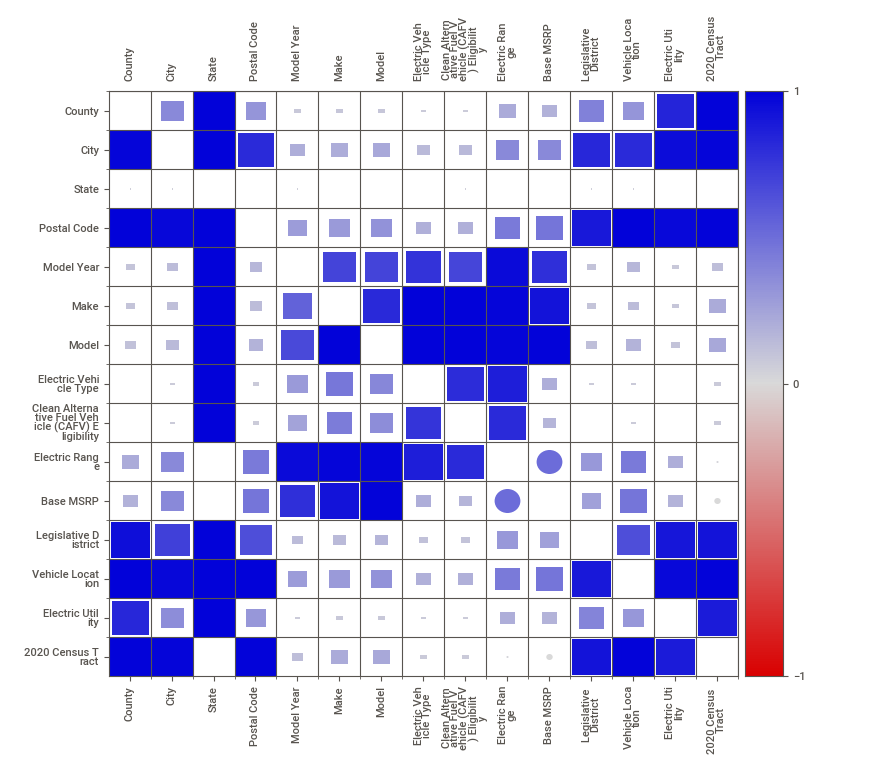

In [ ]:
intra_report.show_notebook()

In [ ]:
ev_analysis= sv.analyze(ev_2, target_feat= 'City')
ev_analysis.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)

ValueError: ignored